## Assignment Alternus Vera 

### Team: Psychic Pandas
### Name: Mudrita Chaturvedi
### Factor: Political Affiliation


** As part of Alternus Vera assignment, Here we are trying to analyze liar liar dataset for partisan biasnes which includes two parties i.e. democratic and republic.**

* Data set used: Liar Liar.


In [7]:

import pandas as pd
import numpy as np
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize

In [8]:
# Training data
dataset_train = pd.read_csv('liar_dataset/train.tsv', delimiter = '\t', quoting = 3, header=None)
dataset_train.columns = ["id", "label", "statement", "subject", "speaker", "speaker_title", "State", "party_affiliation", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire","context"]
dataset_train.head(5)

# Testing data
dataset_test = pd.read_csv('liar_dataset/test.tsv', delimiter = '\t', quoting = 3, header=None)
dataset_test.columns = ["id", "label", "statement", "subject", "speaker", "speaker_title", "State", "party_affiliation", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire","context"]
dataset_test.head(5)

id       label                                          statement  \
0  11972.json        true  Building a wall on the U.S.-Mexico border will...   
1  11685.json       false  Wisconsin is on pace to double the number of l...   
2  11096.json       false  Says John McCain has done nothing to help the ...   
3   5209.json   half-true  Suzanne Bonamici supports a plan that will cut...   
4   9524.json  pants-fire  When asked by a reporter whether hes at the ce...   

                                             subject  \
0                                        immigration   
1                                               jobs   
2                    military,veterans,voting-record   
3  medicare,message-machine-2012,campaign-adverti...   
4  campaign-finance,legal-issues,campaign-adverti...   

                            speaker         speaker_title      State  \
0                        rick-perry              Governor      Texas   
1                 katrina-shankland  State representative  Wisconsin   
2                      donald-trump       President-Elect   New York   
3                     rob-cornilles            consultant     Oregon   
4  state-democratic-party-wisconsin                   NaN  Wisconsin   

  party_affiliation  barely_true  false  half_true  mostly_true  \
0        republican           30     30         42           23   
1          democrat            2      1          0            0   
2        republican           63    114         51           37   
3        republican            1      1          3            1   
4          democrat            5      7          2            2   

   pants_on_fire                       context  
0             18               Radio interview  
1              0             a news conference  
2             61  comments on ABC's This Week.  
3              1                  a radio show  
4              7                   a web video

In [388]:

dataset_republican=dataset_train.statement[(dataset_train['party_affiliation']=='republican')]
print(dataset_republican.shape)

dataset_democrat=dataset_train.statement[(dataset_train['party_affiliation']=='democrat')]
print(dataset_democrat.shape)


#Test data
dataset_republican_test=dataset_test.statement[(dataset_train['party_affiliation']=='republican')]
print(dataset_republican_test.shape)

dataset_democrat_test=dataset_test.statement[(dataset_train['party_affiliation']=='democrat')]
print(dataset_democrat_test.shape)


(4510,)
(3345,)
(571,)
(401,)


In [612]:
X.party_affiliation.value_counts()
dataset_test.party_affiliation.unique()

array(['republican', 'democrat', 'none', 'activist', 'organization',
       'libertarian', 'journalist', 'independent', 'columnist',
       'state-official', 'business-leader', 'talk-show-host',
       'government-body', 'newsmaker', 'county-commissioner',
       'constitution-party'], dtype=object)

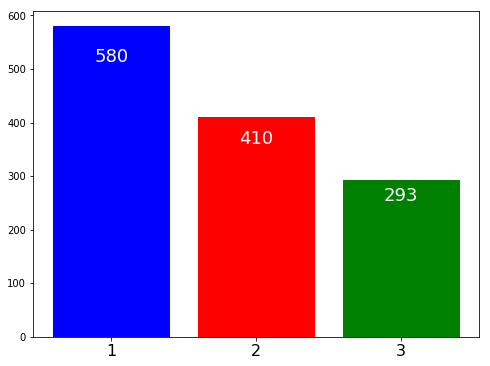

In [620]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,6))

party_label = X.party_affiliation.value_counts()
name=['republican','democrat','others']

ax.bar(range(3), party_label)
ax.set_xticks(range(3))
ax.set_xticklabels(party_label.index, fontsize=16)


for rect, c, value in zip(ax.patches, ['b', 'r', 'g','y','magenta','yellow'], party_label.values):
    rect.set_color(c)
    height = rect.get_height()
    width = rect.get_width()
    x_loc = rect.get_x()
    ax.text(x_loc + width/2, 0.9*height, value, ha='center', va='center', fontsize=18, color='white')

### Preprocessing data
** Following steps were taken for preprocessing the data **
* Tokenizing 
* Removing stop words
* Stemming
* Lemmetizing

### Tokenizing

In [528]:
# remove common words and tokenize
# stoplist = set('for a of the and to in'.split())

from gensim import corpora

documents = dataset_train['statement']

texts = [[word for word in document.lower().split() if word not in stoplist]
        for document in documents]

# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
         for text in texts]

from pprint import pprint  # pretty-printer
print(texts)

[['says', 'list', 'political', 'group', 'supports', 'third-trimester', 'abortions', 'on', 'demand.'], ['when', 'did', 'decline', 'coal', 'it', 'started', 'when', 'natural', 'gas', 'took', 'off', 'that', 'started', 'begin', '(president', 'george', 'w.)', 'bushs', 'administration.'], ['hillary', 'clinton', 'agrees', 'with', 'john', 'mccain', '"by', 'voting', 'give', 'george', 'bush', 'benefit', 'doubt', 'on'], ['health', 'care', 'reform', 'legislation', 'is', 'likely', 'mandate', 'free', 'sex', 'change', 'surgeries.'], ['economic', 'turnaround', 'started', 'at', 'end', 'my', 'term.'], ['chicago', 'bears', 'have', 'had', 'more', 'starting', 'quarterbacks', 'last', '10', 'years', 'than', 'total', 'number', 'tenured', 'faculty', 'fired', 'during', 'last', 'two', 'decades.'], ['jim', 'has', 'not', 'lived', 'district', 'he', 'represents', 'years', 'now.'], ['"i\'m', 'only', 'person', 'on', 'this', 'stage', 'who', 'has', 'worked', 'actively', 'just', 'last', 'year', 'along', 'with', 'russ', 'f

In [ ]:
subj_docs[0]

### Stopwords

In [390]:

from nltk.corpus import stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

documents = dataset_train['statement']
documents_test = dataset_test['statement']

dataset_train['statement_processed'] = documents.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

print(documents[10244])
print(dataset_train['statement_processed'][10244])


dataset_test['statement_processed'] = documents_test.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

print(documents_test[1244])
print(dataset_test['statement_processed'][1244])



The Obama administration spent $205,075 in stimulus funds to relocate a shrub that sells for $16.
The Obama administration spent $205,075 stimulus funds relocate shrub sells $16.
When it comes to jobless workers, Mitt Romney says he likes to fire people.
When comes jobless workers, Mitt Romney says likes fire people.


### Stemming

In [391]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem('running')

dataset_train['statement_processed'] = dataset_train['statement_processed'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split() if word not in (stop)]))

dataset_test['statement_processed'] = dataset_test['statement_processed'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split() if word not in (stop)]))

print(documents[10244])
print(dataset_train['statement_processed'][10244])

print(documents_test[1244])
print(dataset_test['statement_processed'][1244])


The Obama administration spent $205,075 in stimulus funds to relocate a shrub that sells for $16.
the obama administr spent $205,075 stimulu fund reloc shrub sell $16.
When it comes to jobless workers, Mitt Romney says he likes to fire people.
when come jobless workers, mitt romney say like fire people.


### Lemmatizing

In [392]:
from textblob import Word
dataset_train['statement_processed'] = dataset_train['statement_processed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

dataset_test['statement_processed'] = dataset_test['statement_processed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


print(documents[10244])
print(dataset_train['statement_processed'][10244])

print(documents_test[1244])
print(dataset_test['statement_processed'][1244])


The Obama administration spent $205,075 in stimulus funds to relocate a shrub that sells for $16.
the obama administr spent $205,075 stimulu fund reloc shrub sell $16.
When it comes to jobless workers, Mitt Romney says he likes to fire people.
when come jobless workers, mitt romney say like fire people.


### Remove number and punctuation from documents

In [393]:
import re
dataset_train['statement_processed'] = dataset_train['statement_processed'].replace('\d+', '', regex = True)

dataset_train['statement_processed'] = dataset_train['statement_processed'].apply(lambda x: " ".join([re.sub(r'[^\w\s]','',word) for word in x.split()]))

print(dataset_train['statement_processed'][10244])


dataset_test['statement_processed'] = dataset_test['statement_processed'].replace('\d+', '', regex = True)

dataset_test['statement_processed'] = dataset_test['statement_processed'].apply(lambda x: " ".join([re.sub(r'[^\w\s]','',word) for word in x.split()]))

print(dataset_test['statement_processed'][1244])


the obama administr spent  stimulu fund reloc shrub sell 
when come jobless workers mitt romney say like fire people


In [394]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc = dataset_train['statement_processed']

tfidf = TfidfVectorizer().fit_transform(doc)
pairwise_similarity = tfidf * tfidf.T

## Applying sentiment analysis

In [1]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import * 
n_instances = 100
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


(100, 100)

In [2]:
train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs
sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
len(unigram_feats)


83

In [3]:
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)

trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)

for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.8
F-measure [subj]: 0.8
Precision [obj]: 0.8
Precision [subj]: 0.8
Recall [obj]: 0.8
Recall [subj]: 0.8


In [9]:
dataset_train['document']=dataset_train['statement']
for i in range (0, 10269):
    if(  pd.isnull(dataset_train['speaker'][i])):
        print(dataset_train['statement'][i])
    else:
        dataset_train['document'][i]=dataset_train['document'][i]+' '+dataset_train['speaker'][i]
        

for i in range (0, 10269):
    if(  pd.isnull(dataset_train['speaker_title'][i])):
        print(dataset_train['statement'][i])
    else:
        dataset_train['document'][i]=dataset_train['document'][i]+' '+dataset_train['speaker_title'][i]
    
for i in range (0, 10269):
    if(  pd.isnull(dataset_train['State'][i])):
        print(dataset_train['statement'][i])
    else:
        dataset_train['document'][i]=dataset_train['document'][i]+' '+dataset_train['State'][i]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Health care reform legislation is likely to mandate free sex change surgeries.
The economic turnaround started at the end of my term.
Jim Dunnam has not lived in the district he represents for years now.
However, it took $19.5 million in Oregon Lottery funds for the Port of Newport to eventually land the new NOAA Marine Operations Center-Pacific.
The economy bled $24 billion due to the government shutdown.
U.S. Rep. Ron Kind, D-Wis., and his fellow Democrats went on a spending spree and now their credit card is maxed out
Says Scott Walker favors cutting up to 350,000 families and children off health care.
The nuclear test conducted in our nation this time is the Earth's 2,054th nuclear test. The five permanent members of the U.N. Security Council have conducted 99.99 percent of the total nuclear tests.
In the case of a catastrophic event, the Atlanta-area offices of the Centers for Disease Control and Prevention will self-destruct.
Says Marco Rubio skipped 18 defense votes including on

Says two-thirds of groups targeted for IRS scrutiny were not conservative.
In the class of 1968 at Patrice Lumumba University in Moscow, Mahmoud Abbas was one of the members of that class, and so was Ali Khamenei. And thats where they first established relationships with the young Vladimir Putin.
Says it has offered $12 million in savings through 2011 and $184 million in savings over the next 25 years in contract negotiations with the City of Milwaukee.
Clackamas County Commissioners approved a re-negotiated agreement to lower the countys contribution to TriMets Portland-Milwaukie Light Rail project to $19.9 million from $25 million.
The GOP budget plan would cut nearly a million jobs.
There are more people living in this country who were not born here than at anytime in the history of the country.
The Postal Services financial losses result from a 2006 law that drains $5 billion a year from post office revenue, while the Postal Service is forced to overpay billions more into federal a

Wisconsins attorney general and state treasurer ordered the daughter of Earth Day founder Gaylord Nelson not to discuss climate change on state time.
Says unions take away hard-earned money of teachers, firefighters and police officers to play politics.
Embryonic stem cell research is at a dead end, with no one good example of a successful treatment.
Tens of thousands of Atlanta households pay more than 30 percent of their income towards rent.
Rick Perry had planned to retire from the legislature until his best friend, David Weeks, and I talked him into switching parties and running for the GOP nomination for agriculture commissioner.
As the usage [of synthetic marijuana] has dramatically increased, instances of violence, bodily harm and even death have risen with it.
Look at the debt that has been accumulated in the last two years. Its more debt under this president than all those other presidents combined.
The Chris Hani Baragwanath in South Africa is the worlds third-biggest hospita

Barbara Boxers worried about the weather instead of terrorism as the biggest threat to national security.
"We spend three times more on entitlements and debt services than we do on defense."
Of the approximately 6 million disenfranchised felons in the United States, one-quarter are Floridians.
Gov. Rick Perry has overseen the highest Texas unemployment in 22 years.
Ed Gillespies 2006 book promoted an individual health care mandate, and recommends that it be enforced by the IRS through the income tax code.
Department of Veterans Affairs doctors are prohibited from recommending medical marijuana.
Said former U.S. Ambassador to Kenya Scott Gration was forced to resign two years ago because of his personal use of emails.
Said they reached a power-sharing agreement with Republican Lt. Gov. Casey Cagle
Earlier this year, [John DePetro] was accused of sexually assaulting a female co-worker.
Photo of "tea party" protests shows crowd sprawling from Capitol to Washington Monument
Every one of th

"I've traveled the country advocating for the FairTax ..."
Says Deborah Ross supports the Iran nuclear deal and the ransom it paid for hostages.
Says Ron Johnson has essentially done nothing to fight heroin addiction and opioid abuse.
Says unemployment tripled in Dane County due to Kathleen Falks tax policies
"Jeff Greene only moved from California to Florida in the last two years. In fact, he would not legally be allowed to run for any other statewide office because he has not lived here long enough to meet the residency requirement."
President Obama has increased the federal workforce 192,000 individuals -- about 10 percent since hes taken office -- while weve lost 2 million jobs.
Obamacare will provide coverage for abortions, despite the presidents commitment that it would not.
Handel endorsed gay adoption in 2003 when she was running for chairwoman of the Fulton County Commission.
President Barack Obama met with Iranian president Hassan Rouhani.
The church Barack Obama belongs to h

Says someone earning $50,000 a year will fare better under his 9-9-9 plan than under the current tax system.
Says Democratic U.S. Senate candidate Tammy Baldwin ranks as the most liberal member of the House.
We have at least 200,000 to 300,000 hate crimes in a given year.
Says critics called the original GI Bill welfare.
"I didn't endorse" the federal stimulus bill.
Says Wisconsin Gov. Scott Walker doesnt make his calendar public -- hes on our dime and we dont know where he is.
What is the maximum number of students allowed in your classroom? ... 30 or more!
Says in regard to providing more tax cuts for the rich, Bill Pascrell said, Republicans had great ideas. I liked some of their ideas.
John McCain "voted against the Bush tax cuts, both times."
The average student debt coming out of the University of Wisconsin-Madison is something like 28,000 dollars.
Says Los Angeles Clippers owner Donald Sterling is a Democrat.
FACT: the special assistant in @johnkasichs office makes over three ti

By using a little-known loophole ... Obama minions are allowing Nestle Company to export precious fresh water out of Lake Michigan.
Every 1 percent increase in the cost of health insurance today causes about 30,000 Georgians to be uninsured.
As Governor: Romney did not keep public safety funding in line with inflation.
We have reduced funding for education the least. Theyve suffered the least cuts.
Says the federal government threatened to impose a no-fly zone in Texas if state legislators bar airport security officials from performing pat-downs.
Malawi has just 300 doctors for 16 million people.
We doubled the size of the company (Hewlett-Packard).
Obama taps porn lawyer for #2 at Justice.
Florida's legal challenge of the federal health care bill is "bipartisan."
The truth is, Planned Parenthood does not provide mammograms. Planned Parenthood refers women to mammography providers, serving as the middlewoman, if you will.
When ICE releases illegal immigrants, a lot of those people are 

The weight of the evidence (on global warming) is that most of it, maybe all of it, is because of natural causes ... its fair to say the science is in dispute.
On new dollar coins, In God We Trust is gone!
Freshman Rep. Bob Gibbs is spending his one year anniversary on vacation only working 6 days in all of January.
Says Obama flip-flopped on banning handguns.
[T]he Georgia Dome has returned $10 billion in economic impact to the state of Georgia.
Other Western countries have ended their "Don't Ask, Don't Tell" policies.
The U.S. is borrowing approximately $2.52 for every $1 of economic growth so far in 2012.
The Northwest Corridor highway project in Cobb and Cherokee counties is expected to create over 9,700 jobs statewide.
Says Hillary Clinton is proposing destroying Medicare for seniors.
On supporting winner of Democratic primary with her superdelegate vote.
The IRS has been specifically forbidden ... from ever actually pursuing either civil or criminal remedies for people who dont p

Florida shelled out more money for drug testing than it saved by denying welfare benefits to people who tested positive for drugs.
Democrats are poised now to cause this largest tax increase in U.S. history.
Youre more likely to be the victim of a violent crime in Milwaukee than in 96 percent of the country.
With Rick Scott, there are more funds for preschool education.
Says Thomas Jefferson helped craft the Constitution.
Says U.S. Rep. Tammy Baldwin, a candidate for Senate, supports raising taxes by $858 billion.
Says Democratic challenger Russ Feingold was the deciding vote on Obamacare.
Florida has the most errors and exonerations from death row.
"He (Kirk) did violate Pentagon rules, twice actually, for improperly mingling politics with his military service."
Obama's plan to raise the capital gains tax "hurts the middle class."
The House Zika bill limits access to birth control services needed to help curb the spread of the virus in Puerto Rico.
Says JoAnne Kloppenburg has told us 

"Law enforcement in the state of Arizona supports" the state's new immigration law.
Obama creates new tax on Christmas trees, fees get passed on to consumers.
That 59 divisions in Philly had no votes for Romney in 2012 is (a) mathematical and statistical impossibility.
Says Barack Obama has gone from blaming George W. Bush to plagiarizing George W. Bush.
"House Speaker Nancy Pelosi said this week that the Democrats have to pass their terrible health care bill so that the American people can actually find out what's in it."
2008: Unions Spent $400 Million to Elect Obama.
"Our graduation rate is the highest it's ever been."
Terrorist detainees were not covered by the Geneva Convention. They were unlawful combatants. And under those circumstances, they were not entitled to the normal kinds of courtesies and treatment.
Says Patrick Murphy supports a gun ban on commonly owned semi-automatic firearms used for hunting, recreational shooting and self defense.
Says Mary Burkes 2007-09 state bud

By voting to approve [Question 1], we can . . . save 900 jobs at Twin River.
Says Obama replaced the American flag on the tail of his plane with his campaign logo.
In a budget deal struck in 2011 a trillion dollars of cuts went into effect immediately, and then a special committee was set up ... to get agreement on another $3 trillion of cuts.
"Under the Baucus bill ... federal funds would subsidize coverage of elective abortions."
Cap-and-trade is wildly unpopular with Americans.
Teachers were not involved in developing the Common Core State Standards.
Says Ron Johnson voted to turn Medicare into a voucher program.
Barack Obama's church gave a lifetime achievement award to Louis Farrakhan.
Said state insurance commissioner candidate Ralph Hudgens fights hard to strip women of life-saving coverage such as mammograms.
My two appointments to the Florida Supreme Court, Raul Cantero and Kenneth Bell, have earned reputations as its most consistent conservatives.
Says legislation supported b

"Congressman McCollum voted to dismantle Social Security."
Nevada is No. 1 in unemployment, violent crime, car theft, divorce, robberies and foreclosures.
"Floridas high school graduation rate falls well below the national average."
Says four Democratic state senators voted to raise taxes on Wisconsin workers by another $510 a month so freeloaders can get free state-run health care.
Annexation would lead to overcrowding at Decaturs city schools.
Says former Miami-Dade Mayor Carlos Alvarez and current mayoral candidate Carlos Gimenez both drove fancy European cars at taxpayer expense.
Sen. Barbara Boxer voted against immigration reform to permit (Hispanic immigrants) people to come here legally to work.
"The public option is not funded with public money. It's funded with private insurance premiums."
Women in Oregon are paid 79 cents for every dollar paid to men. If the wage gap was eliminated, a working woman in Oregon would have enough money for 2,877 gallons of gas, 72 more weeks of f

Florida sends $135 billion and D.C. returns $150 billion.
Opponent Glenn Hegar expressed pride in legislated cuts to public school funding.
The Obama administration offered $900 million to Hamas, a recognized terrorist organization, to rebuild Gaza.
Says Wisconsin Gov. Scott Walker is making voting more difficult by closing Department of Motor Vehicles offices where low-income voters live.
Right now, we have the lowest gas tax of anywhere in the country.
Says Mitt Romney was director of a company that stole millions from Medicare.
Atlanta now has as many visitors as Las Vegas, San Diego and Los Angeles. Orlando, Fla., and New York City still have more visitors.
Bill OBriens Tea Party legislature tried to repeal kindergarten and compulsory education, defund Planned Parenthood and eliminate insurance coverage for birth control.
Says Proposition 205 blocks market entry for new marijuana dispensaries.
We refused to balance the budget on the backs of our children.
When Chuck Schumer and Mar

Says the Treasury Department says 41 percent of all business income reported on individual returns would be hit by the [millionaires] surtax that would harm small businessmen and women, the very people we are counting on to create new jobs.
Says PolitiFact says Amendment 4 will force counties and cities across Florida to raise taxes and fees.
Says U.S. Rep. Steve Southerland voted himself health care for life.
A proposed San Antonio ordinance will allow men into womens restrooms in the city.
Since 1999, 440 people have been killed in attacks on church property in the United States.
Says Scott Walker runs a state government that bans employees from talking about climate change.
"As a state senator, he (Obama) even refused to support a measure to stop sex businesses from opening near schools or places of worship!"
We are in the sixth year of recovery, and median income is below what it was at the start of the recovery.
Says Nevada state Sen. Michael Roberson forced Common Core for Nevada

State Rep. Kathleen Peters has a 100 percent pro-abortion voting record even voting against a ban on sex-selection abortions.
Honduras bans citizens from owning guns and has the highest homicide rate in the entire world. Switzerland, with a similar population, requires citizens to own guns and has the lowest homicide rate in the entire world.
8.5 million Americans have gotten rebate checks because their insurance companies were spending too much money on executive bonuses and administrative costs and not enough on health care.
Obamas flush with cash, returning to Wall Street for even more money. Wall Street sure supports President Obama.
In 2005 and 2007, Joe Straus received a 100 percent rating by NARAL (the National Abortion and Reproductive Rights Action League).
Says Gov. Scott Walker signed abortion, sex education and discrimination bills in secret.
Rubio's tax swap proposal "would have been a massive tax increase."
We had the biggest drop of the rate of unemployment (in)all but 4

Says in 2012 Obama won in every state that did not require a photo ID and lost in every state that did require a photo ID in order to vote.
On support for the Export-Import Bank
Says he didnt have an involvement withnutritional supplement company Mannatech.
"We worked together to enact ... the largest tax cut in Florida history."
U.S. taxpayers paid $71,500 per job created by the stimulus bill.
Says President Obama helped more than half a million veterans and military family members go to college through the Post-9/11 G.I. Bill.
In our proposal, we would have expanded school aid across the board Governor Christie slashed school aid in this budget, preferring instead to extend a tax break for millionaires over funding in the classroom.
Public employees receive something like 25 percent of the paychecks that are issued in Rhode Island.
Social Security doesnt contribute a penny to the deficit.
The DNC hack showed you that the Clinton campaign was working to schedule (primary) debates agai

Atlanta Tea Party co-founder Debbie Dooley wants gas taxes raised.
As a result of welfare reform, poverty levels went down to the lowest level ever for ... African-American children.
John Mica's brother is an oil lobbyist and his daughter represents the natural gas industry.
Last year, there were an additional 81,000 pages of government regulations. If you stack that up, it would be a three-story building.
The largest number of gamblers are from the poorest segments of the population.
Says Gov. Rick Scott cut state funding for PBS.
Attorney general candidate Brad Schimel is in cahoots with Wisconsin Right to Life to make abortion a crime in Wisconsin.
Bill McCollum explained his lack of action on mortgage fraud by saying, "You can't do everything."
The United States is behind many countries in Europe in terms of the ability of every kid in America to get ahead.
Says we are overcharging students . . . to help pay for the health care law.
Says Ellen Rosenblum has said over and over again

Allen West called Social Security a Ponzi scheme and said this countrys got to get on sound footing by destroying it.
Says it wasnt until he and a Senate colleague were able to wrangle the actual streaming video from BP that scientists were able to calculate the oil spill flow.
A bag of Cheetos costs less to buy than an apple, and in some Milwaukee neighborhoods good luck trying to find an apple or a banana or some sort of healthy option
Senator Webb was a reliable vote for President Obama and Senator Harry Reid.
In Wisconsin, Gov. Scott Walker has created a manufacturing-led jobs recovery. 30,000 new jobs were created this year, with 15,000 created in the struggling manufacturing sector.
"The ACLU has filed a suit to have all military cross-shaped headstones removed."
An overwhelming majority of Americans support passage of the DREAM Act, which would provide a path to citizenship for undocumented youth willing to work for a college degree or serve in our armed forces.
James Langevin h

Obama said troops "whine about bearing the costs" of going to war.
Says there was a NATO base in Turkey being under attack by terrorists.
Barack Hussein Obama will force doctors to assist homosexuals in buying surrogate babies.
"One state even spent a million bucks to put up signs that advertise that they were spending on the federal stimulus projects."
Says Newt Gingrich is responsible for the gridlocked politics of Washington.
Twenty-seven out-of-state pharmaceutical companies have raised more campaign dollars (against a drug price control measure) than all other state ballot measures have raised to date, combined.
As part of efforts to rein in protesters, Republicans in Wisconsin have bolted windows inside the Capitol shut.
Things like having Friday classes have been shown to be very effective on college campuses in reducing drinking.
As Virginias governor, Allen cut spending and waste with bipartisan support.
"The pastor McCain calls his 'spiritual guide,' Rod Parsley, believes Ame

Says New Jerseys public school students have the best Advanced Placement scores in the nation.
"We only have 2 percent of the oil reserves in the world, and we consume 25 percent of the world's oil on a daily basis."
Dave Aronbergs career legal experience is less than two years as Asst. AG/private attorney.
Gains in Atlanta Public Schools scores on a national standardized test lend credence to dramatic score increases on state tests.
Romneycare sent costs spiraling out of control in Massachusetts, hiking premiums, squeezing household budgets.
Members of Congress passed a pay raise for themselves of $10,000 over two years even as they voted not to raise Social Security benefits for 2010 and 2011.
Says Gov. Scott Walkers proposed budget would sell off Wisconsins state parks.
Says Kelly Ayotte voted to fix background checks.
Says the Texas unemployment rate has even grown more than the nations as a whole.
On sharing power with Republicans
Some cardiologists estimate 70 percent of all male

In other jurisdictions where (a domestic partnership registry) has been enacted, we have seen that fewer people enter into marriage.
Congressman Renacci is under FBI investigation.
U.S. Rep. John Barrow of Georgia has helped support the implementation of Obamacare.
A YouGov.com poll shows 71 percent of Obama voters regret voting for him.
Obama opposed exploring for energy in Alaska.
Rick Scott has heavily invested in a company that is geared to helping illegal aliens transfer money to family and friends out of the country."
Says state Senate recall challenger Sandy Pasch voted to cut school aid by nearly $300 million.
On bringing casino gambling and other gaming to Georgia
Mitt Romney received exactly zero votes in at least 12 Cuyahoga County precincts.
Ron Oakleys conservative leadership protected local taxpayers over government bureaucrats as theWater Management Districts budget decreased by 58 percent in the four years he served on the board.
Kewpie burgers are delicious. An Ohio in

Film and television productions generated a $6 billion economic impact for Georgias economy in the most recent fiscal year.
Says Gov. Scott Walker took away $1.6 billion from schools and handed it off as over $2 billion in tax breaks to the rich.
Says Reps. Rush Holt, Frank Pallone and Bill Pascrell are willing to jeopardize seniors access to coverage by gutting $741 billion from Medicare to pay for a big-government healthcare takeover.
Horse racing could boost Georgias economy by $1 billion a year and create 10,000 to 20,000 jobs.
Russ Feingold voted against the law that protected our lakes and was the only Great Lakes senator to vote no.
Barack Obama has consistently voted against tougher penalties for criminals.
Palin "inherited a city with zero debt, but left it with indebtedness of over $22-million."
Florida is one of only three states that require licenses for commercial interior designers.
"Nobody has been talking about it (Medicaid fraud), focused on it, or paying attention to 

Says the California flag was supposed to be apear, not a bear.
Texas Governor Rick Perrys voter ID law is a blatant effort to defeat Wendy Davis by disenfranchising tens of thousands of women voters.
Says U.S. Rep. Stephen Fincher breaks earmark pledge.
Obama "closed offshore tax safe havens."
"Health care mandate will require imprisonment and fines for Americans who cant afford to purchase insurance or pay hefty government penalties."
Says his tax plan wouldnt leave the federal government with a $1.1 trillion hole.
U.S. Rep. John Barrows plan puts the IRS in charge of your health care.
For every [coyote] they kill, the population will replace and usually multiply.
Number of Americans killed by terrorism in the last decade: 24. Number of Americans killed by guns in the last decade: 280,024.
"The Books Sarah Palin tried to have banned."
Says Colorado congressional candidate Morgan Carroll voted to allow welfare recipients to use your tax dollars at ATMs at strip clubs and pot dispensari

Michelle Nunns foundation directed grants to an Islamic group tied to radical terrorists.
Pam Bondi refuses to take a position on the gay-adoption ban.
By 12th grade, more than 3 out of 10 girls have been pregnant at least once.
Illegal immigration costs Georgia $2.4 billion a year
Tom Barrett voted for the largest tax increase in history ... raising taxes on gas and Social Security.
California is home to the largest death row populationin the Western Hemisphere.
A private school tax break in the Wisconsin state budget is the most generous in the nation.
For decades before I was elected, governors tried and failed to get Minnesota out of the top 10 highest-taxed states in the country. I actually did it.
In the U.S., African-Americans continue to be arrested at nearly three and one half times the rate of whites on marijuana charges.
A majority of drunk driving deaths and injuries are caused by drunk driving offenders with no prior convictions.
On ISIS, (Michael Bennet) chose the (Washin

Ninety percent of people living in Gaza dont have access even to water.
Says Barack Obama said that ordinary men and women are too small-minded to govern their own affairs and that individuals should surrender their rights to an all-powerful sovereign.
Says a man in Ferguson, Mo., was photographed holding a sign that said, No mother should have to fear for her sons life every time he robs a store.
[Former Georgia congressman] Bob Barr voted ... to raise his own pay.
It is estimated that Arizona has lost more than $100 million in hospitality industry revenues since passage of the Arizona immigration laws.
The Seattle Times called Patty Murray a prolific sponsor of earmarks. Patty even defended the Bridge to Nowhere.
Creflo Dollar has endorsed Republican Donald Trump for president.
Says New Jersey is losing 50 football fields of open space to development every day and the more we develop upstream the more flooding we have downstream.
Says U.S. Senate candidate Tammy Baldwin proposed a $3

Liberty University students were mandated to attend Sen. Ted Cruzs presidential announcement or they would be fined.
Slim Jims just recently cost 99 cents but now cost $2.69.
President Barack Obama and Secretary of State John Kerry agreed to lift Irans economic and arms sanctions without any proof of change in conduct.
We lock up close to 2.4 million people in this country. Were locking up more people than China and Russia.
You can fill out your tax return in Estonia online in five minutes.
Says Marco Rubio endorsed Obamacare for his own family.
Charlie Crist stopped layoffs of some 20,000 school teachers during the global economic meltdown.
Says Russ Feingold supported a stimulus plan that allowed a company to create 3,000 jobs in China.
Says Madison Mayor Paul Soglins stated intent when proposing that city contractors disclose private political donations was to discourage contributions to organizations with which he disagrees.
A Republican bill that would change John Doe criminal inv

No one in the private sector gets unlimited accruals of vacation and sick leave.
Says Obama has flip-flopped on public campaign financing.
Ronald Reagans signature on the 1986 amnesty act gave Barack Obama about 15 million additional Hispanic votes in 2012.
Says Texas U.S. Rep. Pete Sessions said the GOPs goal is to go back to the same exact policies that were in place before this president took office... policies that crashed the economy.
Says Donald Trump said the government is going to pay for everybody to have health care.
Says 11 states have more people on welfare than employed.
On the economic stimulus.
Say Ohio Reps. Marcia Fudge, Marcy Kaptur and Dennis Kucinich are socialists who are openly serving in the U.S. Congress.
Says Alex Sink supported more taxes on water and TV.
Says Dan Patrick has called immigration into Texas an invasion and said immigrants coming into Texas bring third-world diseases.
Polls show Americans are overwhelmingly opposed to Obamacare, especially the in

﻿﻿Since Mayor Kennedy OBrien took office Sayreville has issued 22,081 building permits! Now OBrien is holding secret meetings with big developers.
Go look on the West Point website and youll see those specific words, full scholarship to West Point. So even though it is, you know, given as a grant for anybody who gets in, those words are used.
There are twice as many gun shops as McDonalds in the United States.
If we keep the minimum wage at the current level, then single-parent families earning the minimum wage at a full-time job will live in poverty in New Jersey.
Says Connie Mack failed to pay his child support.
Says David Jolly lobbied on a plan by Rep. Paul Ryan that would turn Medicare into a voucher program.
St. Pete Beachs experiences are a fair example of what could happen if Amendment 4 passes.
Paul Ryan is one of only six House Republicans who voted for Teddy Kennedys bill to force Christian employers to hire LGBT employees.
Many state and federal agencies have such navigator

Jesus was an undocumented immigrant.
Final election 2016 numbers: Trump won the popular vote.
Says opponents of proposed Austin school district bonds say the districts debt load doubles with these new bonds.
Every 20 seconds, a child dies because they lack access to clean water and sanitation.
Says New Jersey has the highest unemployment rate in the region and stagnant job growth.
Sen. Barbara Boxer passed only three bills in 18 years into law.
State employees havent received a raise in five or six years.
Georgia is one of only five states where breweries cant sell you a pint of beer to drink on premise or sell you a six-pack to go.
Teenage births cost Texas taxpayers $1.1 billion in health care, foster careand lost tax revenue in 2010 alone.
Says she made an accurate prediction that if Barack Obama were elected it would encourage Russia to invade Ukraine.
I am the only person in this field who is against amnesty. Every other person in this field wants to allow people who are here ille

"He positions himself as pro environment, but he scored a zero yes, zero from the League of Conservation Voters last year."
Since 2000, only 10 cases of in-person voter fraud have been proven nationally.
As we watch the news from Colorado with horror and sympathy for the families, we should remember that each day more than 80 Americans are killed by gunfire, unnecessary tragedies.
Says Mitt Romney flip-flopped on supporting the presidents Recovery Act.
(The Tax Policy Center) found that Romney would raise taxes on the average middle class family by $2,000 to pay for $5 trillion in tax cuts for millionaires and billionaires.
Private prisons do not chase escaped inmates past the perimeter like the public prisons do, which means more escaped prisoners in our communities.
Says Charlie Crist rode on a jet that belongs to a serial polluter with a history of environmental violations fined nearly $2 million for polluting water.
"I signed the largest single tax cut in the history of Florida, a 

Two-thirds of the federal budget is permanent law ... its permanently appropriated.
The average age of first marijuana use is 12.
President Obama is a Muslim.
Zephyr Teachout says she is against Super PACs despite taking money from Super PAC donors
Says Ohio Treasurer Josh Mandel first claimed bank fraud in June 2010 but did nothing for more than a year while raising money for his (Republican) Senate campaign.
Says Mitt Romney has said different things about whether global warming is caused by humans
Obamacare (hit) Americans with over $500 billion in new taxes.
Georgia has "a dropout rate thats higher" than Alabama's.
Says Mitt Romney flip-flopped on gun control.
Says Rick Scott cut education by over a billion dollars, meaning thousands of teachers lost their jobs and class sizes went up.
Protesters attacked the groups headquarters with graffiti on the sidewalk and stenciled images smeared on the building and statue.
Amendment 4 will reduce Floridas economic output by $34 billion annu

The employer mandate affects only 5 percent of businesses in this country.
Recently we have seen our government debt grow by $3.4 trillion during the first 29 months of the Obama administration -- the equivalent of about $4 billion per day.
We know from the social science that children do best with a mom and a dad.
Under Scott Walker, Wisconsin moved from 16th to third in percentage of people with student loan debt.
Nine out of the 10 poorest states are Red states.
Funding the federal health care law without a tax hike will require the state to cut nearly a quarter of its annual budget.
Republicans actually doctored emails between administration officials about Benghazi. Then, they released them to the press, trying to pass them off as real.
Says Gov. Scott Walker has made Wisconsin 2nd in the nation in losing jobs.
Gov. Rick Scott signed into law a bill that gives Floridas public officials an easy way to avoid disclosing their personal finances.
This is the worst jobs recovery since t

Congressman Robert Hurt has a plan to cut education by 40 percent.
"To say a family has to buy a product from a private company is clearly beyond the delegated powers of the U.S. Constitution."
The federal health care law raises taxes and cuts Medicare.
"The president has added close to 68,000 troops in the last year, since he came into office, not just the 30,000 you hear, but the others that were added before that."
Taking the Fifth Amendment in a deposition about the Columbia/HCA hospital chain he founded means a truthful answer to the questions that (Rick Scott) was asked would incriminate him.
We have more scientists and engineers per square mile than anywhere in the world.
"The Defense Department received only one-half of 1 percent of the nearly trillion-dollar stimulus package funding."
You look at defense were spending more than the rest of the world combined.
Says Daniel Webster used taxpayer funds to build a lobbyist lounge.
Says 97 cents of every dollar played represents ove

Says aWHO proposal portrays milk and dairy products as an obstacle to a healthy start in life.
Says Jon Runyan voted to end programs to aid homeless veterans.
More Hispanics have been elected statewide (in Texas) on the Republican ticket than on the Democratic ticket.
The HOPE scholarship has helped turn our University System into one of the best in the Southeast, with two institutions ranked in the top 20 of public universities in the country.
Says since Australia passed tough gun laws, homicides by firearm have declined almost 60 percent.
The federal government borrows $4 billion every day.
President Barack Obamas policies have forced many parts of the country to experience rolling blackouts.
In Florida, its not illegal for an immediate family member of state officials to prosper from legislation supported by a spouse.
The unemployment rate among (the) non-college-educated is well into the double digits in America. Its 4 percent or 5 percent for people who have college degrees.
Says 

Greenlight Pinellas wont take existing lanes from other vehicles.
Says Ron Johnson opposes entirely a federal minimum wage, except perhaps for guest workers.
For educational testing, Florida has chosen a company that has a significant history of promoting identification of the GLBT lifestyle for children as young as seven years old.
When Charlie Crist was elected governor, Florida ranked 31st in K-12 education. "Last year ... we went from 31st to 14. And this year, the top 10 in America."
Middle-class families throughout America (would) have to pay $6,000 per year to pay for tax cuts for the wealthy.
Says Rep.Mike Coffman istheone who said he would support Trump.
McCain opposed the border fence.
Says Mitt Romney has said we dont need more firemen, more policemen, more teachers.
Says union bosses bused protesters to aCentral Florida education protest.
On transparency in dealing with the Republican Party of Florida's financial issues.
Oregon House Republicans jobs plan could generate mor

Says Gov. Doug Ducey wants to use taxpayer dollars to increase the salaries of private prison guards.
In the last 6 years, there have been 420 elections for State Senator and State Representative. Only three incumbents have been defeated!
Says Mitt Romney said we are going to have to live with high gas prices, its a good thing because it will reduce consumption, we dont want to produce any more gasoline.
One of the reasons I believe were in trouble in Yemen is we lost the population on drone strikes issues. Thats what stirred up the population. Thats what is happening in Yemen.
Says President Barack Obama is absolutely a Muslim.
Says Ted Strickland supported giving $150 billion to Iranian regime that persecutes women, Christians and gays.
Says David Jollys former firm lobbied for hundreds of millions (of dollars) for a dictator in Pakistan.
Most AGs dont go to court..
Says State Comptroller Matthew Boxer pointed out that many towns are artificially lowering the real estate values that 

Over the past few months, we've learned that "we just can't count on the media to debunk" lies about health insurance reform.
The Republican-controlled Wisconsin Assembly approved only one out of 376 amendments offered by Assembly Democrats in 2011.
We sell 40 percent of our guns without a background check.
"All non-US citizens, illegal or not, will be provided with free health care services."
Kids coming from an affluent background are taking advantage of all these student loan programs and grants while many middle-class families with no connection to college are picking up the tab.
Rather than prioritize and pass ethics reform measures to restore trust in state government, (Democrats) sat on their hands and did nothing when they were the majority.
Vice President Joe Biden's meeting "with the transparency and accountability board . . . was closed to the public."
If you go back to 1999, Wayne LaPierre testified on behalf of the NRA that background checks were appropriate and should be 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mayor Fung wants to punish our childrens education by removing 12 million dollars from current funding to pay for his private charter school. Your taxes would increase by between 6 and 8 percent per year.
"Under the ruling of the Supreme Court, any lobbyist could go into any legislator and say, if you don't vote our way on this bill, we're going to run a million-dollar campaign against you in your district."
There are a larger number of shark attacks in Florida than there are cases of voter fraud.
Democrats have now become the party of the [Atlanta] metro area and of blacks.
Says an alternative to Social Security that operates in Galveston County, Texas, has meant that participants will retire with a whole lot more money than under Social Security.
On lifting the U.S. Cuban embargo and allowing travel to Cuba.
Health care reform legislation is likely to mandate free sex change surgeries.
However, it took $19.5 million in Oregon Lottery funds for the Port of Newport to eventually land t

What is the proper collective noun for a group of baboons? Believe it or not . . . a Congress!
Upwards of 90 percent of women seeking an abortion decide not to have an abortion after seeing an ultrasound.
In July 1996, Mitt Romney helped locate the missing teenage daughter of a partner at Bain Capital.
Blames Mike McIntyre and Nancy Pelosi for the second straight year of no cost-of-living increases for Social Security beneficiaries.
The government is going to have the right to get into your bank account with the health care bill and make transfers without you knowing it.
"There are mechanisms in place to shut down the Internet privately."
Not even old Gen. Eisenhower saluted military personnel as president.
Says Alex Sink failed Florida homeowners by using predatory lending practices.
Says that Starbucks took Christmas off of their brand new cups.
Atmospheric conditions could push a footballs pressure down approximately one-and-a-half pounds per square inch.
Under legislation that has 

One in four inmates is an illegal immigrant.
Wisconsin is dead last in income growth among midwestern states during Gov. Scott Walkers term.
President Obama in November of last year wiped away (a program) that allows for shared fingerprinting for those who are behind bars so you know who is here legally and illegally.
McCain sought the political support of minister John Hagee, "who believes Hurricane Katrina was God's punishment for gay rights and called the Catholic Church 'the Antichrist' and a 'false cult.'"
Since Wisconsin Gov. Scott Walker took office, we are losing jobs at rates not seen in decades.
Wisconsins attorney general and state treasurer ordered the daughter of Earth Day founder Gaylord Nelson not to discuss climate change on state time.
President Bush never did one interview with the New York Times during his entire presidency.
Mr. Trump is self-financing his campaign, so we dont have any donors.
The U.S. spends more money on its military than the 16 biggest military bu

Ever wonder why no one ever came forward from Obamas past, saying they knew him, attended school with him, was his friend, etc.? Not one person has ever come forward from his past.
Says area near proposed northern Wisconsin iron ore mine is 15 hours away from where public hearing on mining was held.
U.S. police killed more people in just one month than the U.K.s did in over a century.
Crime rises in communities with casinos.
Maj. Nidal Hasan, the man accused of the Fort Hood shootings, "was an ADVISOR to the Obama Administration."
As CEO of WWE, Linda McMahon was caught tipping off a ringside physician about a federal investigation into illegally distributing steroids to wrestlers.
Due to actions by President Barack Obama, the Burger King national headquarters announced this month that they will be pulling their franchises from our military bases.
A 2005 gay pride vote had nothing to do with discrimination.
On the night of the Iowa caucuses, Obama promised the nation that he would do h

No openly gay man has ever been elected to the Georgia Legislature.
U.S. Reps. Eric Cantor and Luis Gutierrez were touring the country last year joined at the hip, working together in a bipartisan fashion indeed for the goal of immigration reform.
"If Sen. Hillary Clinton could enact all of her campaign proposals, taxpayers would be faced with financing more than $777.6-billion in new spending over one White House term."
Dan Gecker voted to double vehicle registration fees, costing (Chesterfield) county residents over $6 million annually.
Birthers have obtained a copy of Obamas Kenyan birth certificate.
I played in a game here against the Pittsburgh Steelers where there was 23 inches of snow. We played in at least 15 inches of that.
The Republican leadership's budget proposal doesn't contain any numbers.
Pentagon confirms they may court martial soldiers who hold Christian faith.
"The Florida Legislature raised taxes and fees by almost $2 billion" in the 2009 session.
Says Hillary Clint

When President AbrahamLincoln signed his Emancipation Proclamation, there were over 300,000 slaveholders who were fighting in the Union army.
Eighty-three law enforcement officers have died in the line of duty this year. Twenty-four of them were shot and killed in cold blood.
Says President Barack Obama has taken less vacation days than any other president in a generation, while Congress has taken more vacation days than any other Congress in history.
Less than two years ago, we made a commitment to repay the U.S. . . .taxpayers in full, and today we made good on that promise.
Cory Gardner is sponsoring a bill to ban all abortions right now.
Sometime in the next decade, there will be more Latinos in the state of Texas than there are Anglos. That will happen sometime in the next five to eight to ten years.
The vast majority of people in this country are keeping their (health insurance) plan.
90% of rural women and 55% of all women are illiterate in Morocco.
Every time weve cut the capit

Tens of thousands of fraudulent Clinton votes found in Ohio warehouse.
Says U.S. Rep. John Barrow left taxpayers on the hook for $950k study on genetic makeup of ants.
On immigration, what reports say President Barack Obama plans to do is roughly on the same scale as what President George H.W. Bush did.
Shirley Sherrod was forced to resign before anybody on Fox said a word about this.
That 3.5 percent (increase in the third quarter GDP) came from two things government spending on Cash for Clunkers they just moved fourth-quarter auto sales into the third quarter and the first-time home buyer thing.
Says Sen. Rand Paul, R-Ky., has stated that supporting the right to health care ... means you believe in slavery.
Says Bernie Sanders health care plan would empower Republicangovernors to take away Medicaid,to take away health insurance for low-income and middle-income working Americans.
A proposed amendment allows a teenager to get a recommendation for medical marijuana without the consent o

Says Newt Gingrich supports amnesty for illegal immigrants.
Says Marco Rubio voted to deport young people known as Dreamers.
Dan Gelber: On the record against scholarships to help our needy children attend Jewish private schools.
Saturdays shootings reflect a disturbing trend. Mass shootings have become commonplace since the Virginia Tech massacre in 2007. There have been dozens of incidents where three or more people have been fatally wounded. Hundreds have died.
Says U.S. Rep. Martin Heinrich spent a trillion of our tax dollars on a stimulus for failed companies here and jobs overseas.
"Obama put a 10 percent tax on tanning."
A working woman will earn $7.70 on $10.
Even when all other state agencies took cuts, Gov. [Nathan] Deal increased education spending every year.
Georgia is now the eighth most populous state in the nation, moving from the number 10 position in just four years.
Cass Sunstein, President Obama's nominee for regulatory czar, "wants to give legal standing to animals

In the 1980s, The lowest income people had the biggest gains.
For every one job created under the Obama administration, 75 people went on food stamps.
Says Bush Jr. handed Obama a $1.4 trillion deficit and Obama reduced Bush Jr.s deficit to just $492 billion.
The Wisconsin Retirement System for public employees is a self-funded pension plan and its the money of the workers that funds it.
Says Bernie Sanders was there when it came to (same-sex) marriage 20 years ago. ... He was there when it wasnt popular.
The administration has issued rules for $1 abortions in ObamaCare and requires all persons enrolled in insurance plans that include elective abortion coverage to pay an abortion premium.
After four years of a celebrity president 85% (of recent college grads are) moving back in with their parents.
Gas will reach $4 a gallon under a cap-and-trade plan.
Says Democratic Senate candidate Bruce Braley voted to cut $700 billion from Medicare to support Obamacare.
Hillary Clinton and Barack O

Says we will pay the new chancellor a basic salary of nearly $300,000 a year ... an amount that does not include the costs of this public employees benefits, perks and living expenses for a lavish house, an upscale car, a spending allowance, and fine dining almost every day on the taxpayer dollar.
Theres no correlation between primary turnout and wins in the fall in the last 11 elections.
The top 1 percent of income earners pay 40 percent of all state income taxes, and those at the bottom pay little or nothing.
If you look at the states where soccer is most popular, theyre overwhelmingly blue states, and the states where soccer is least popular are red states.
Amiddle-class family donates $1 to charity, they get 15 cents off their income tax. Bill Gates donates $1 to charity, he takes 35 cents off his income tax.
Recommendations for a major tax overhaul for Georgia are an overall tax hike.
Do this research watch how much crime picks up if you take away [football].
Every single day in t

Says Donald Trump supports the Wall Street bailout.
Live cats have holes drilled into their skulls, posts put into their heads and coils put into their eyes, and some have had their ears cut off or are intentionally deafened or starved at UW-Madison labs that do research to improve hearing in humans.
Mitt Romney did not endorse Ted Cruz, even though he said he is voting for Cruz and urged others to do likewise.
Says the Treasury Department says 41 percent of all business income reported on individual returns would be hit by the [millionaires] surtax that would harm small businessmen and women, the very people we are counting on to create new jobs.
Says U.S. Rep. Steve Southerland voted himself health care for life.
A proposed San Antonio ordinance will allow men into womens restrooms in the city.
Since 1999, 440 people have been killed in attacks on church property in the United States.
Says Scott Walker runs a state government that bans employees from talking about climate change.
"As

Says indoor workers get less UV than outdoor workers, but they get more melanomas.
Says when Bernie Sanders was in college, Sanders said something very similar to what conservative Wisconsin Supreme Court Justice Rebecca Bradley had written as a college student in the 1990s -- that women have a legitimate role in date rape.
Says Michigan U.S. Senate candidateTerri Lynn Land said guaranteeing equal pay for women who do the same job as men is not a good idea.
Says President Barack Obama is sending a much larger (force) to deal with Ebola than ISIS is getting.
Young women, account for a shocking 74% of all new HIV infections among adolescents in Africa.
In 2012, 123 African-Americans were shot dead by police. ... Same year, 326 whites were killed by police.
The (New England) Patriots were led by an explosive offense that scored the second most points in the NFL.
Says GOP U.S. Rep. Sean Duffy of Wisconsin voted twice to end Medicare.
The immigration bill includes free Obamacars, motorcycle

The cap-and-trade bill before Congress prevents you from selling your home without the permission of the EPA administrator.
"Obama's Ten Point Plan to 'Change' The Second Amendment.Ban the manufacture, sale and possession of handguns."
Says Bernie Sanders opposes requiring all children to have a K-12 education.
Earth has not warmed for the last 17 years.
The major immigration issue was about Poles, and Bulgarians, and Romanians, and that they werent contributing economically. The unemployment rate among Poles in Britain is lower than the unemployment rate among Brits.
Trumps Health Secretary Pick Wants a Medicare Phaseout by Summer 2017.
The United States doesnt have the highest murder rate among developed countries. You look at Russia, you look at Brazil, those are countries that have 3 to 5 times higher murder rates than what we have here in the United States.
The Obama administration willfully leaked the existence of STUXNET (a computer worm used against Iran), allowing our enemies 

Says Russ Feingold wanted to get money out of politics. Now hes profiting from that same dark money.
Says Bobby Jindals parents used his birthright citizenship to become Americans, making him an anchor baby.
A bag of Cheetos costs less to buy than an apple, and in some Milwaukee neighborhoods good luck trying to find an apple or a banana or some sort of healthy option
Says he is the only candidate in the race for Clackamas County Chair who will refuse to join the Public Employees Retirement System.
In Wisconsin, Gov. Scott Walker has created a manufacturing-led jobs recovery. 30,000 new jobs were created this year, with 15,000 created in the struggling manufacturing sector.
Polls indicate that white people think that black people are less intelligent. They think theyre less trustworthy, less patriotic.
Congress, criminals, Scientologists and other groups are exempt from Obamacare.
About 40 percent of workers dont ... have a single paid sick day.
"The ACLU has filed a suit to have all m

You can absolutely get a gun if you have several felonies as long as you buy it on the Internet or at a gun show.
Says that Tim Pawlenty eliminated health insurance for 33,000 to 35,000 people when he was governor of Minnesota.
Thanks to actions by the Milwaukee County Board on the 2013 budget, the amount of county taxes on the average home in the city of Milwaukee would be a $19 decrease.
Says Colorado food stamp recipients can use ATMs to get cash to buy marijuana.
The State of Wisconsin thinks you should have to wash your hands at least 28 times to make one peanut butter-and-jelly sandwich.
"Hillary interned with Bob Treuhaft, the head of the California Communist Party."
Across the board, violent crime in jurisdictions that recognize the Right to Carry is lower than in areas that prevent it.
Even if you took literally every single ounce of platinum in the world, it still wouldnt add up to enough needed to pay down our nations debt.
A new law requires the USDA to approve the harvest 

President Obama has stopped using the phrase war on terror.
Geithner still didn't correct the same type of error for some years, even after the Internal Revenue Service flagged him for the failure to pay the taxes in other years.
A typical married couple will contribute $119,000 into Medicare but will receive $357,000 in Medicare benefits over their lifetimes.
We have cut crime across every single zone in the city of Atlanta by between 10 percent and 16 percent, depending on the zone.
AIG insures the pension trust of the United States Congress!
More than half of all drivers licenses issued in California this year have gone to illegal aliens.
We just dont want to get to be like Louisiana, where you have drive-up daiquiri shops.
A database police use to look up wanted suspects excludes certain warrants issued by Atlanta Municipal Court.
Welcome to Wisconsin road signs have always been made in Wisconsin,but Scott Walker is outsourcing themto an out-of-state company and paying more money f

Stimulus money went to office upgrades for politicians.
Says George Soros and Bill Gates are funding a bioweapons lab in Sierra Leone that caused the Ebola outbreak.
To comply with non-discrimination laws, the government is forcing people in business to make wedding cakes for anyone.
Radio Marti and TV Marti have spent more than $500 million to reach less than 1 percent of the Cuban population.
"The House Democrats' so-called 'stimulus' has been stuffed with an astonishing $335 million to fund prevention programs of sexually transmitted diseases."
(Birmingham, Ala.) is the cradle of the civil rights movement.
Because of Gov. Scott Walkers budgeting, a greater percentage of general fund tax dollars is going to pay off debt than ever before in our history.
Says Mitt Romney has flip-flopped on his support for President Reagans policies.
We also have, in a park thats not far from here, an ability to build a reservoir that can hold a 30-day water supply for the city of Atlanta.
Congressman 

Congressional Republicans have introduced dozens of bills on social issues and other topics, but zero on job creation.
Obama "closed offshore tax safe havens."
On foreign policy, Joe Biden was against aid for Vietnam, said the fall of the Shah was a step forward for human rights in Iran, opposed Reagans defense build-up and voted against the first Gulf War.
Says his tax plan wouldnt leave the federal government with a $1.1 trillion hole.
U.S. Rep. John Barrows plan puts the IRS in charge of your health care.
Number of Americans killed by terrorism in the last decade: 24. Number of Americans killed by guns in the last decade: 280,024.
"The Books Sarah Palin tried to have banned."
Says Colorado congressional candidate Morgan Carroll voted to allow welfare recipients to use your tax dollars at ATMs at strip clubs and pot dispensaries.
"Georgia has the most restrictive ballot access laws in the country.
Condemning violence against the police and urging support for the police is markedly ab

Millionaires working side by side with George Soros are bankrolling (John Kasichs) super PAC.
In the weekend after the terrorist attacks in Paris, the White House said this couldnt happen in the United States. ISIS couldnt reach us here.
Mitt Romney ... gave you government health care that is now bankrupting the state of Massachusetts.
In North Carolina, paid family leave is more popular than college basketball.
44% of homeless people are employed.
Statistics show one male cat can father 420,000 kittens in five years.
"The Pentagon under the Obama administration has just acknowledged seizing and burning the privately owned Bibles of American soldiers serving in Afghanistan."
In Minnesota, well over 6,200 election-day registrations from 2008 proved fraudulent.
Clinton "refused repeated requests to meet with the Gold Star Mothers."
Says enrolling a student in a subsidized lunch program triggers an at risk designation, resulting in an extra $6,000 to $7,000 of state school aid per student

The church Barack Obama belongs to only admits black people.
The Milwaukee County Board approved a reform package by a 15-3 vote, meaning Board Supervisors salaries will be cut by 20 percent and the Boards budget will be cut by 50 percent.
"Bill Young uses his campaign money for, among other things, a luxury car."
Says excise taxes are...disproportionately burdening middle- and lower-income consumers.
After actions by Gov. Scott Walker and Republicans, Wisconsin is dead broke.
Georgia still has one of the richest programs in terms of scholarships for students to go to college.
In reality, gas produced by fracking is worse for the climate than coal.
"The Children's Defense Fund rated McCain as the worst senator in Congress for children."
Say in November 2010, voters overwhelmingly supported the idea of creating a (library) district.
Under President Barack Obamas jobs bill, you can sue if you are unemployed and dont get the job and think you werent hired because you are unemployed.
Obama

Say Ohio Reps. Marcia Fudge, Marcy Kaptur and Dennis Kucinich are socialists who are openly serving in the U.S. Congress.
Democrats very much are in the pocket of the NRA.
Says Supreme Court nominee Merrick Garlandvoted, so the folks know, in Washington, D.C., to keep guns away from private citizens.
Supreme Court 15 times over the last 120 years has said marriage is a fundamental right and never said it had to be between a man and a woman.
Says Alex Sink supported more taxes on water and TV.
"A Houston school district analysis found that the (State Board of Education) more than quadrupled the number of historical figures students must learn about."
We have been confronted with an unexpected storm that has hit the metropolitan area.
Among manufacturers with fewer than 50 employees, the average cost in terms of regulations is $34,000 per employee.
U.S. Rep. Scott Rigell wants gun owners in a federal registration system.
Says Ohio Gov. John Kasich had the worst rating on spending of any 

Judithanne McLauchlan was part of a group that supports imposing a state income tax on Floridians.
The Republican Party has the worst reputation in American polling of any political party in history.
Nevada is still a state that is 80 percent white voters.
Brewpubs cant sell growlers of their beer to customers.
Did U know? Block Island Wind Farm would mean 40% est. drop in BI electric rates.
Says Israel Prime Minister Benjamin Netanyahu didnt change his position on a two-state solution.
Says Alex Sink supported a $5.2 billion increase in Floridas debt.
Frank Guinta voted to make middle class taxpayers pay over a $1,000 more a year in taxes.
The Pink Pony club in DeKalb County has never been cited for any violation of an ordinance or state law.
North Korea is telling its people that their mens national team is in the World Cup final.
Says David Jolly refused to cut spending for a national greenhouse in D.C.
The CDC issued a report commissioned by President Obama just earlier this year, 

Gov. Scott Walkers plan to freeze pay for state employees includes a 5.4 percent raise for himself.
In Wisconsin, 300,000 voters were turned away by the states strict voter ID law in the 2016 presidential election.
There is not one single federal housing program yet that has not needed a bailout to survive.
Sheriffs Call For Obamas Lynching While Leader Meets With GOP Senators
Proposed immigration legislation would give new immigrants a taxpayer-funded cellular phone.
Illegal immigrants mow the grass around the (Texas) Capitol.
In a few months, this deal would give Iran $150 billion for its $300 billion to $400 billion economy, which is like $8 trillion flowing into the United States treasury.
There are over 2,000 crimes recorded per 100,000 population in the U.K., compared to 466 violent crimes per 100,000 in the United States.
Says the majority of Americans support gay marriage.
Says Obama adviser David Plouffe took large piles of cash from a joint venture partner of a company owned 

Anyone who knows you can just look it up to see if you voted.
Says Mitt Romney flip-flopped on abortion.
Almost 88,000 United States service members are still missing and unaccounted for, dating back to World War II.
Says Mark Warner has supported restrictions on veterans second amendment rights.
Says U.S. Senate candidate Joni Ernst signed a pledge that protects tax breaks for companies that ship jobs overseas.
From 2014 to 2015, Austins murder rate is up a whopping 83 percent.
It is against the law for the NSA to record or monitor Americans phone calls without getting a specific FISA warrant to do so.
Hillary Clinton was against setting a deadline for withdrawal, but now she wants a "precipitous withdrawal" regardless of "conditions on the ground" or "consequences of a defeat for the United States," an RNC radio ad.
In Ferguson, Mo.,youve got threeblack officers and 50 white officers with a town that is 67 percent African-American.
More than 50 percent of immigrants from (El Salvador

The Obama administration is proposing to mine another 10 billion tons of Wyoming coal, which would unleash three times more carbon pollution than Obamas Clean Power Plan would even save through 2030.
Says Gov. Scott Walker is openly backing a move to abolish the state retirement system and convert it to a 401(k)-style plan that will reduce pensions by at least a third for current and retired public employees
Many of the 9/11 conspirators came from the Muslim Brotherhood, including Osama bin Laden, Ayman Zawahiri and Khalid Sheikh Mohammed.
Under the Nuclear Nonproliferation Treaty enrichment has been limited to basically the weapons states.
How many concerts would Taylor Swift have to perform to pay off one day of interest on our national debt? She would have to perform every day for three years.
Congress has cut funding, has slashed funding, for veterans benefits over these last years.
Siemens has been unable to fill approximately 200 skilled trade positions in metro Atlanta.
Georgia 

Says Bill Clinton gave a speech in 1996 about Iraq having WMDs and said we needed a regime change, even though everyone blamed those things on George W. Bush.
Fox admits they lie and, under the First Amendment, have the right to lie or deliberately distort news reports on public airwaves.
Federal investigators found a company that (David Perdue) ran discriminated against women -- paid them less than men for the same work.
Says Bill Nelson cast the deciding vote for Obamacare cutting Medicare spending by $700 billion and letting an unelected board decide what gets covered here.
Barack Hussein Obama will .. force Christian organizations to pay for abortions.
Barack Hussein Obama will ... force Christian schools to hire non-Christian teachers.
Texas is experiencing the fastest population growth in the country, adding more than 1,000 people a day.
"There are no earmarks" in the stimulus bill.
Says Senate candidate Katie McGinty made thousands from companies she previously regulated.
Says L

300,000 Floridians will lose their current health plans because of Obamacare, a plan Alex Sink supports.
Lincoln Chafee voted with President George W. Bush and the conservative leadership 76% of the time.
There are fewerwars, there are fewerpeople dying in wars now than there have been in quite some time.
So far, the war in Gaza has left more than 1,800 Palestinians dead -- the population equivalent to 100 9/11s.
Only 25 percent of what people buy is subject to Rhode Islands sales tax.
The post-Soviet industrial meltdown is responsible for most of the progress in reducing carbon emissions that Europe is able to claim.
Says 74 percent of small-business people believe that Obamacare is a bad idea.
The study of the Savannah River Estuary . . . clearly demonstrates the project can be constructed and [environmental] impacts will be mitigated.
Sotomayor ruled against the white firefighter Ricci and other white firefighters just on the basis that she thought women and minorities should be giv

Says Paul Ryan shut off the C-SPAN cameras when the Democrats started their sit-in.
In Georgia, hard-earned lottery dollars are doled out to the scion[s] of wealthy families.
Having a baby is aleading cause of poverty spells in the United States.
Says President Barack Obama is absolutely a Muslim.
Says Ted Strickland supported giving $150 billion to Iranian regime that persecutes women, Christians and gays.
Says David Jollys former firm lobbied for hundreds of millions (of dollars) for a dictator in Pakistan.
Says State Comptroller Matthew Boxer pointed out that many towns are artificially lowering the real estate values that they report to Trenton in order to get hundreds of millions of dollars of additional school aid. This is the kind of fraud that needs to be addressed immediately.
Milwaukee incarcerates 1.2% of white men and has incarcerated over 50% of black men in their 30s.
When President Barack Obama said ISIS, or ISIL, was contained, he was responding very specifically to the

In [10]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [11]:
document = dataset_train[['id','statement','label','party_affiliation']]

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import pprint

sia = SIA()
results = []
i=0

for line in document.statement:
    pol_score = sia.polarity_scores(line)
    print (line)
    print(pol_score)
    print('----')
    pol_score['headline'] = line
    pol_score['part_affiliation'] = document.party_affiliation[i]
    pol_score['label'] = document.label[i]
    i=i+1
    results.append(pol_score)
    

print(results[:3])


Says the Annies List political group supports third-trimester abortions on demand.
{'neg': 0.115, 'neu': 0.692, 'pos': 0.192, 'compound': 0.25}
----
When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.3612}
----
Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
{'neg': 0.107, 'neu': 0.687, 'pos': 0.206, 'compound': 0.3182}
----
Health care reform legislation is likely to mandate free sex change surgeries.
{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.7579}
----
The economic turnaround started at the end of my term.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.
{'neg': 0.12, 'neu': 0.836, 'pos': 0.043, 'compound': 

{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.4939}
----
Enacting the Right-to-Carry Act would amount to expanding the rights of sex offenders, terrorists, child predators, and abusers to carry concealed weapons across state lines.
{'neg': 0.384, 'neu': 0.616, 'pos': 0.0, 'compound': -0.9201}
----
"I haven't missed a vote since 1993."
{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.2235}
----
Says the treasurers office has saved $37 million in management costs for the oversight of public investments.
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4939}
----
Says Georgia will send more state money per child to state charter schools and that budget cuts are not applied to those charter schools.
{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.296}
----
Jorge Elorza wants to impose a municipal income tax.
{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}
----
The Supreme Court cant overrule the other two branchesof government.
{'neg': 0.0, 'neu': 

----
Nearly 90% of Travis County government races will be settled by the time of the Democratic primary.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Says Mahatma Gandhi once said, First they ignore you, then they laugh at you, then they fight you, then you win.
{'neg': 0.173, 'neu': 0.576, 'pos': 0.251, 'compound': 0.5106}
----
Savings that I achieved helped fund cameras on the border. As a result, more than 21,500 arrests have been made and 46 tons of narcotics confiscated.
{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.4877}
----
"The American people will be appalled to learn the health care bill exempts (congressional) leadership and committee staff."
{'neg': 0.135, 'neu': 0.721, 'pos': 0.144, 'compound': 0.0516}
----
Says the number of Americans living at or below the poverty line is at its highest level since 1964.
{'neg': 0.153, 'neu': 0.787, 'pos': 0.06, 'compound': -0.4588}
----
The IRS will have the ability potentially to deny or delay health care.
{'ne

----
Jeff Weems legal record is one of defending BP, Enron and just about every big oil company against the working man.
{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.128}
----
Our crime rate continues to plummet.
{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.5423}
----
If you sell your house after 2012 you will pay a 3.8 percent sales tax on it.
{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.1027}
----
The NRA supported background checks...
{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.3182}
----
A tax plan promoted by North Carolina Senate candidate Thom Tillis will overwhelmingly benefit the wealthy.
{'neg': 0.072, 'neu': 0.529, 'pos': 0.399, 'compound': 0.7783}
----
Prior to 1962, everybody prayed before school started, and the Bible was the principal textbook in all schools.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
A DeKalb sewer project will create up to 4,000 direct jobs per year at peak production, many of which will be set a

Palin "stopped the Bridge to Nowhere."
{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.2263}
----
Says the state tax burden per citizen in New York is twice as high as in Florida.
{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.4404}
----
Two thirds of the people in Wisconsin strongly disagree with this idea of permanently taking away peoples rights to collective bargaining.
{'neg': 0.11, 'neu': 0.802, 'pos': 0.089, 'compound': -0.128}
----
Says Eric Cantor was the co-author of the House GOP principles on immigration reform. Both the New York Times and the Washington Postsaid that thatcaptured the essence of what was in the Senate immigration bill.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Wisconsins 6th congressional district has more manufacturing jobs than almost any other in the nation.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
I lost my health insurance and my doctor because of Obamacare.
{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'c

I have never lobbied for offshore oil drilling.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Glenn Hegar promised to eliminate the property tax.
{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}
----
When the Milwaukee County mental health facility is full, cops sit out there in their squad cars with a mentally ill patient and sometimes spend an entire shift out there doing that.
{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.4215}
----
Says Mitt Romney is proposing a tax cut that gives an average of $250,000 to every millionaire in this country.
{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.2732}
----
Says Abortion clinics in Oregon, as in most states, have no state oversight and are not held to basic health or safety standards.
{'neg': 0.094, 'neu': 0.8, 'pos': 0.107, 'compound': 0.0865}
----
The budget for the Consumer Financial Protection Bureau is only about 1 percent of the amount banks generate just from late fees and overdraft fees.
{

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
If youre earning under $100,000 a year and you commute to New York every day you pay more to the Port Authority in tolls than you pay to the state of New Jersey in income tax.
{'neg': 0.078, 'neu': 0.886, 'pos': 0.036, 'compound': -0.128}
----
In Chile they have 72 percent of the GDP in savings.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
There are 850,000 Ohio jobs tied to the auto industry.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
The Mexican government forces many bad people into our country.
{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compound': -0.5423}
----
A sitting sheriff cannot be charged except by a warrant issued by a Superior Court judge.
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.6239}
----
Since 1999, all Virginia Lottery profits have been used for public education in the Commonwealth for kindergarten through 12th grade.
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound':

U.S. Rep. Patrick Murphy voted to allow members of Congress to receive taxpayer-funded health care for life.
{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.6249}
----
Under Floridas voting law, a requirement to turn in voter registrations within 48 hours makes it impossible to meet the deadline if youre working right to the end of the week.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
There are a multitude of vaccines that do not prevent deadly and crippling diseases.
{'neg': 0.082, 'neu': 0.918, 'pos': 0.0, 'compound': -0.0191}
----
We dont have bars on campus in Texas. Its against the law... no alcohol allowed.
{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.296}
----
Says there have been well over 54 million abortions since 1973.
{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2732}
----
China holds 26 percent of the U.S. debt.
{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.3612}
----
Says Portland has higher standards than feds on allow

Says in our region, 2011 was worst drought year ever recorded.
{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.6249}
----
In the 1980s, The lowest income people had the biggest gains.
{'neg': 0.186, 'neu': 0.643, 'pos': 0.171, 'compound': -0.0516}
----
Florida has issued more than 3 million conceal carry permits in the past 30 years. Only 168 have been revoked.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
For every one job created under the Obama administration, 75 people went on food stamps.
{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.25}
----
Says that after she declared her candidacy for Congress, the redistricting process was manipulated to allow incumbent politicians to guarantee their re-election.
{'neg': 0.102, 'neu': 0.745, 'pos': 0.153, 'compound': 0.0772}
----
Says Chris Koster opposes right-to-work efforts because he has taken $8 million from union bosses.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Says Bush Jr. handed Obama a

----
If you have a job in this country, (theres a) 97 percent chance that youre not going to be in poverty.
{'neg': 0.142, 'neu': 0.773, 'pos': 0.086, 'compound': -0.3182}
----
According to the U.S. Census Bureau, 71.2 percent of Hispanic registered voters in Texas and over 86 percent of African American registered voters participated in the 2012 elections.
{'neg': 0.088, 'neu': 0.912, 'pos': 0.0, 'compound': -0.3818}
----
Wisconsins state budget is almost twice as large per person as the state budget of Texas, and even after billions in tax cuts, Wisconsins working families and businesses remain subject to a heavy tax burden.
{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'compound': -0.6249}
----
Says Target installed urinals in a womens bathroom to accommodate the ones who have giblets.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
An anonymous e-mail says that Hillary Clinton advocates communism.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Says CNNs Wolf Blitz

The Export-Import Bank doesnt cost taxpayers anything.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Says Gov. Rick Scott is spending a quarter of a million of our tax dollars to robocall people.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Obama says hes put forward a specific $4 trillion deficit reduction plan.
{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.4019}
----
On allowing abortion in cases of rape or incest, I have never said that or advocated that.
{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.6908}
----
In South Florida, weve had nine inches of sea-level rise since the 1920s.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
"Inequality in Texas is steadily getting worse, with very few rich people, a great many poor people, and fewer and fewer in the middle."
{'neg': 0.187, 'neu': 0.573, 'pos': 0.24, 'compound': 0.4173}
----
Says Mitt Romney has a corporation in Bermuda (but) failed to disclose that on seven different f

----
The Green Bay Packers are a socialist organization.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
"The first installment of health care reform ... will raise the deficit by $250 billion."
{'neg': 0.143, 'neu': 0.688, 'pos': 0.169, 'compound': 0.128}
----
Economic inequality in Multnomah County has a face -- and a name. It has 90,000 faces and names -- the number of county residents who are still unemployed, or underemployed, in the wake of the 2008 Wall Street crash.
{'neg': 0.069, 'neu': 0.897, 'pos': 0.033, 'compound': -0.34}
----
On tax breaks for businesses
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Greg Abbott was charged with overseeing the state cancer research fund. But he let his wealthiest donors take tens of millions of taxpayer dollars without proper oversight. They showered Abbott with gifts and free vacations.
{'neg': 0.142, 'neu': 0.709, 'pos': 0.149, 'compound': 0.0772}
----
My debt to GDP was the lowest or one of the lowest of modern p

New Mexico moved "up to" sixth in the nation in job growth.
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.3818}
----
"We worked together to enact ... the largest tax cut in Florida history."
{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.2732}
----
Bill Nelson actually voted in favor of higher taxes 272 times.
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019}
----
Says he opposed $716 billion cut to Medicare.
{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.2732}
----
We spend less than 2 percent more every year. That is the lowest increase in spending since they have been keeping numbers.
{'neg': 0.109, 'neu': 0.795, 'pos': 0.096, 'compound': -0.0772}
----
President Barack Obama said at the beginning of the negotiations that the basic approach was to dismantle Irans nuclear program in exchange for dismantling the sanctions.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
The United States has never stood by and seen innocent people slaugh

A World Health Organization report shows that more people are dying of TB.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
More than a quarter of mortgage borrowers are underwater, and 11 percent of all homes are vacant.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Paul Ryans budget keeps the Obamacare taxes and spending cuts that paid for Obamacare, but then cuts all of the benefits.
{'neg': 0.171, 'neu': 0.698, 'pos': 0.132, 'compound': 0.0}
----
Agriculture contributes $71 billion to Georgias economy annually, making it the states largest industry.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
If Gov. Romneys plan goes into effect the average senior would have to pay $460 a year more in tax for their Social Security.
{'neg': 0.056, 'neu': 0.847, 'pos': 0.097, 'compound': 0.25}
----
Says Lloyd Doggett voted for the health care, stimulus and cap-and-trade bills.
{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4939}
----
Twenty four states h

Our median income here in Providence is the same as the median income in Mississippi.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
U.S. Sen. Kay Bailey Hutchison voted to continue Roe v. Wade.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Paul Ryans Medicare plan provides pretty much the same coverage that members of Congress receive.
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.4939}
----
We do not have an overcrowding problem. As a matter of fact, Rhode Island has one of the lowest incarceration rates in the country.
{'neg': 0.201, 'neu': 0.758, 'pos': 0.042, 'compound': -0.6369}
----
Says Rep. Jim Renacci was trying to leave town for the holidays without extending your payroll tax cut.
{'neg': 0.158, 'neu': 0.718, 'pos': 0.124, 'compound': 0.0772}
----
Rather than work to secure the border, (Marco Rubio) supported Obamas amnesty plan for illegal immigrants.
{'neg': 0.169, 'neu': 0.61, 'pos': 0.221, 'compound': 0.0258}
----
Says Hillary Clinton ga

The growth in health care costs has been reined in through the Affordable Care Act.
{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.8402}
----
We have an increase in murder within our cities, the biggest in 45 years.
{'neg': 0.247, 'neu': 0.632, 'pos': 0.121, 'compound': -0.5267}
----
The minimum wage in real terms right now is below where it was when Harry Truman was in office.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
"There are so many loopholes ... our businesses pay effectively one of the lowest tax rates in the world."
{'neg': 0.175, 'neu': 0.699, 'pos': 0.127, 'compound': -0.0258}
----
Says hes proposed the largest employer contribution to the Virginia Retirement System in history.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
While the sequester is in effect, the federal government is still funding a study on duck penises.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
"A number of the national publications have put this race in 

{'neg': 0.128, 'neu': 0.722, 'pos': 0.15, 'compound': 0.1027}
----
Says Marco Rubio has the worst voting record there is today.
{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.6249}
----
Millions of dollars are spent by Planned Parenthood to elect Democrats to the House of Representatives and the Senate.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
The biggest job of the surgeon general is to translate health care and health care needs into plain English.
{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.7506}
----
Says Barack Obama is a hypocrite for criticizing President George W. Bushs drone attack program, then using it aggressively as president.
{'neg': 0.317, 'neu': 0.683, 'pos': 0.0, 'compound': -0.7845}
----
Says Measure 11 is one of the most significant reasons for decrease in violent crime.
{'neg': 0.344, 'neu': 0.558, 'pos': 0.097, 'compound': -0.7436}
----
Says 160,000 kids stay home every day because they are afraid to go to school because of bul

By eliminating the public intervenors office, I was the first one to fire Kathleen Falk.
{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.34}
----
Says Rick Santorum voted to let convicted felons vote.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
"The costs for families (in the individual market) for the same type of coverage that they're currently receiving would go down 14 percent to 20 percent."
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Says he voted no on the Wall Street bailouts.
{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296}
----
Seniors enrolled in Medicare Advantage are going to see an average premium increase between $50 and $90 per month.
{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5106}
----
Says Republicans want to cut education by 25 percent.
{'neg': 0.202, 'neu': 0.673, 'pos': 0.125, 'compound': -0.2023}
----
Says a bill requiring ultrasounds before abortions was supported by Republicans and Democrats.
{'neg':

There are more members of the U.S. Senate than the number of WI families who would benefit from GOP estate tax break.
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.5106}
----
New Jersey has the second highest rate of institutionalization of people with developmental disabilities in America. Only Texas puts more of its citizens -- confines more of its citizens -- to institutions than New Jersey.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
The spillover violence (from Mexico) in Texas is real and it is escalating.
{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'compound': -0.6249}
----
Says of Mitch McConnell,What can happen in 30 years? A senator can become a multi-millionaire in public office.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Since taking office, President Obama has signed into law spending increases of nearly 25 percent for domestic government agencies, an 84 percent increase when you include the failed stimulus.
{'neg': 0.101, 'neu': 0.828,

"The Republican governor who stood up and cut spending instead of raising taxes."
{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.2732}
----
Because of the Trans-Pacific Partnership weve got a country like Malaysia taking really serious efforts to crack down on human trafficking.
{'neg': 0.072, 'neu': 0.815, 'pos': 0.113, 'compound': 0.228}
----
Kohls Department Stores in 2012 announced the creation of 3,000 new jobs.
{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2732}
----
Says Ron Johnson supported a plan to cut benefits and raise the retirement age for Social Security.
{'neg': 0.098, 'neu': 0.561, 'pos': 0.341, 'compound': 0.6369}
----
"Mitt Romney says the next president doesn't need foreign policy experience."
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
The GOP health care plan "would allow health insurance companies to continue engaging in unfair and discriminatory practices like denying coverage to people because of a pre-existing medical condition.

Says U.S. Senate opponent Tommy Thompson personally made over $3 million from a federal contract granted to his healthcare company, but left 9/11 first responders without the care they were promised.
{'neg': 0.098, 'neu': 0.767, 'pos': 0.135, 'compound': 0.0793}
----
The Senate voted this week to allow illegal aliens access to Social Security benefits.
{'neg': 0.176, 'neu': 0.488, 'pos': 0.337, 'compound': 0.3182}
----
In Iraq, civilian deaths, incidents of bombings, etc., remain very low relative to what was going on last year.
{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'compound': -0.3384}
----
Obamacare has caused millions of full-time jobs to become part-time.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
In the period from 2007 to 2011, the Office of Health Insurance Commissioner reported an 18 percent decline in the states total medical spending.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Like Marco Rubio, Sen. Barack Obama had one of the worst attendan

{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.4588}
----
Perry pushed for a law that lets insurance companies raise homeowners rates without having to justify the increase.
{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3182}
----
Jason Carter backed three of Nathan Deals budgets but accuses the governor of underfunding education.
{'neg': 0.181, 'neu': 0.758, 'pos': 0.061, 'compound': -0.4678}
----
Says President Obama was wrong about Muslims historical contributions to mankind, such as algebra (actually that was the ancient Babylonians), the compass (that was the Chinese), pens (the Chinese again) and medical discoveries.
{'neg': 0.088, 'neu': 0.912, 'pos': 0.0, 'compound': -0.4767}
----
As a congressman, Mark Neumann voted four times to increase our debt.
{'neg': 0.181, 'neu': 0.652, 'pos': 0.167, 'compound': -0.0516}
----
On oil drilling off Floridas coast
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
If parents "don't have health insurance that Senator

----
Natalyn Archibong skipped (Atlanta) City Council meetings or was late 90% of the time. Then she voted herself a pay raise.
{'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'compound': -0.1027}
----
Under Republican-backed state budget, the state education agency estimates expansion of Wisconsins school voucher program could cost nearly $2 billion annually
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Says abill he vetoed to give driver licenses to certain immigrants known as Dreamers would havechanged nothing.
{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.2732}
----
U.S. military uniforms are manufactured in China.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
The Bush tax cuts helped to create a substantial part of the deficit.
{'neg': 0.292, 'neu': 0.476, 'pos': 0.232, 'compound': -0.25}
----
We have invested record funding in protecting our environment.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
$2.4 million of the NIH dollars was spen

{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4019}
----
Here in Wisconsin, weve put in previous budgets more money into mental health services than any governor has in the last 25 years.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Surveys of teens in high school reveal that knowing a classmate who sells cannabis is 90 times more common than knowing a classmate who sells alcohol.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
For every extra year that a girl stays in secondary school, her chance of getting infected with HIV/AIDS decreases by half.
{'neg': 0.138, 'neu': 0.776, 'pos': 0.086, 'compound': -0.296}
----
In Washington, Congressman Joe Heck supports privatizing (Social Security), turning our savings over to Wall Street and risking it on the stock market.
{'neg': 0.089, 'neu': 0.814, 'pos': 0.097, 'compound': 0.0516}
----
The InterLink at T.F. Green Airport is the closest air-rail link in the country.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'com

----
During eight years under Ronald Reagan, African-American median income rose by about $5,000.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
The largest enterprise in the world is the federal government of the United States of America
{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.4215}
----
Says Oregon ranks 30th in the nation with regard to its incarceration rate.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
After 30 years of inaction, we raised fuel standards so that by the middle of the next decade, cars and trucks will go twice as far on a gallon of gas.
{'neg': 0.065, 'neu': 0.935, 'pos': 0.0, 'compound': -0.25}
----
Says Jeb Bush has released 10 percent of his emails.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
More private-sector jobs were created in the first eight months of 2010 than in the eight years of the Bush administration.
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.25}
----
Creeping defense commitments in

----
Florida ranks last in the ratio of employees to residents...And Florida is dead last in the nation in state employee payroll expenditures per resident.
{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'compound': -0.6486}
----
President Barack Obamas Fiscal Year 2013 budget proposal couldnt get support from either party in the House or the Senate.
{'neg': 0.098, 'neu': 0.784, 'pos': 0.118, 'compound': 0.1134}
----
Every engine manufacturer in the United States is now in the state of Texas.
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4215}
----
Wisconsin was embroiled in a constitutional crisis brought on by the Democratic senators fleeing the state for Illinois to block Gov. Scott Walkers budget-repair bill.
{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.7906}
----
In 2011, (the Islamic State) attempted to attack Fort Knox.
{'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'compound': -0.4767}
----
Thanks to our policies, for the first time in state history, we have put million

There are fewerwars, there are fewerpeople dying in wars now than there have been in quite some time.
{'neg': 0.175, 'neu': 0.825, 'pos': 0.0, 'compound': -0.5574}
----
So far, the war in Gaza has left more than 1,800 Palestinians dead -- the population equivalent to 100 9/11s.
{'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.8578}
----
Says Scott Walker left college under an ethical cloud for having tried to fix the election for student body president.
{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.5106}
----
Only 25 percent of what people buy is subject to Rhode Islands sales tax.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Says the Affordable Care Act has already reduced the number of uninsured in Oregon by 10 percent.
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5423}
----
The post-Soviet industrial meltdown is responsible for most of the progress in reducing carbon emissions that Europe is able to claim.
{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 

----
"Gasoline would rise in price by approximately 50 cents a gallon" if the McCain-Lieberman bill became law.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Turkeys today weigh 29.8 pounds. In the 30s, they weighed 13.2 pounds.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
The health care law includes a 3.8% sales tax on all real estate transactions.
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.4939}
----
America has lost over 50,000 manufacturing factories on other trade deals.
{'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.3182}
----
"The board of a nonprofit organization on which Obama served as a paid director ... granted funding to a controversial Arab group."
{'neg': 0.087, 'neu': 0.817, 'pos': 0.096, 'compound': 0.0516}
----
We lose an average of 90 Americans every day because of guns.
{'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.4019}
----
McCain "voted against a bill to ban waterboarding, and then applauded President Bus

In [12]:
df = pd.DataFrame.from_records(results)
df.head()

compound                                           headline        label  \
0    0.2500  Says the Annies List political group supports ...        false   
1    0.3612  When did the decline of coal start? It started...    half-true   
2    0.3182  Hillary Clinton agrees with John McCain "by vo...  mostly-true   
3    0.7579  Health care reform legislation is likely to ma...        false   
4    0.0000  The economic turnaround started at the end of ...    half-true   

     neg    neu part_affiliation    pos  
0  0.115  0.692       republican  0.192  
1  0.000  0.902         democrat  0.098  
2  0.107  0.687         democrat  0.206  
3  0.000  0.606             none  0.394  
4  0.000  1.000         democrat  0.000

In [13]:
df['sentiment'] = 0
df.loc[df['compound'] > 0.2, 'sentiment'] = 1
df.loc[df['compound'] < -0.2, 'sentiment'] = -1
df.head()

compound                                           headline        label  \
0    0.2500  Says the Annies List political group supports ...        false   
1    0.3612  When did the decline of coal start? It started...    half-true   
2    0.3182  Hillary Clinton agrees with John McCain "by vo...  mostly-true   
3    0.7579  Health care reform legislation is likely to ma...        false   
4    0.0000  The economic turnaround started at the end of ...    half-true   

     neg    neu part_affiliation    pos  sentiment  
0  0.115  0.692       republican  0.192          1  
1  0.000  0.902         democrat  0.098          1  
2  0.107  0.687         democrat  0.206          1  
3  0.000  0.606             none  0.394          1  
4  0.000  1.000         democrat  0.000          0

## Applying classifier

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


X=df.iloc[:,:]


X.values[:,2]=labelencoder.fit_transform(X.values[:,2])
X.values[:,5]=labelencoder.fit_transform(X.values[:,5])


X.loc[X['label'] == 'true', 'label_value'] = 0 
X.loc[X['label'] == 'mostly-true', 'label_value'] = 1
X.loc[X['label'] == 'half-true', 'label_value'] = 2
X.loc[X['label'] == 'pants-fire', 'label_value'] = 3
X.loc[X['label'] == 'false', 'label_value'] = 4
X.loc[X['label'] == 'barely-true', 'label_value'] = 5

X.loc[X['part_affiliation'] == 'republican', 'party_value'] = 1 
X.loc[X['part_affiliation'] == 'democrat', 'party_value'] = 2
X.loc[X['part_affiliation'] == 'none', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'organization', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'independent', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'columnist', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'talk-show-host', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'newsmaker', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'journalist', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'labor-leader', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'state-official', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'business-leader', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'libertarian', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'activist', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'education-official', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'tea-party-member', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'green', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'liberal-party-canada', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'government-body', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'Moderate', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'democratic-farmer-labor', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'ocean-state-tea-party-action', 'party_value'] = 0
X.loc[X['part_affiliation'] == 'constitution-party', 'party_value'] = 0

In [15]:
cols_of_interest = ['compound','party_value','sentiment','pos','neu','neg','compound']

X_doc = X[cols_of_interest]
y = X['label_value']


print(X_doc.shape)
print(y.shape)

(10269, 7)
(10269,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_doc, y, random_state=7,test_size = 0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7188, 7)
(3081, 7)
(7188,)
(3081,)


## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.20804933463161313


In [18]:
cols_of_interest = ['party_value','pos','neu','neg']

X_doc = X[cols_of_interest]
y = X['label_value']


print(X_doc.shape)
print(y.shape)

(10269, 4)
(10269,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_doc, y, random_state=7,test_size = 0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7188, 4)
(3081, 4)
(7188,)
(3081,)


In [20]:
from sklearn.ensemble import RandomForestClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2038299253489127


## SVM

In [21]:

from sklearn import svm


clf = svm.SVC(kernel='linear') 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2103213242453749


### Creating dictionary for republican and democrat topics with train data

** To create the dictionary, firslty we need to seperate the topics associated with democrat and republican.**
** Based on party affiliation label, we distributed the topics into 2 list. I list contains all the topics that have label as 'Republican' and the second list contains all the topics that have label as republican.**

In [510]:
# Splitting documents into republican and democratic
i=0
republican_statement=[]
for statement in dataset_train['statement']:
    if(dataset_train['party_affiliation'][i]=='republican'):
        republican_statement.append(statement)
#     if(statement=='On lifting the U.S. Cuban embargo and allowing travel to Cuba.'):
#         print('found here',dataset_train['party_affiliation'][i])
    i=i+1

i=0
democrat_statement=[]
for statement in dataset_train['statement']:
    if(dataset_train['party_affiliation'][i]=='democrat'):
        democrat_statement.append(statement)
#     if(statement=='On lifting the U.S. Cuban embargo and allowing travel to Cuba.'):
#         print('found',dataset_train['party_affiliation'][i])
    i=i+1

print(len(republican_statement))
print(len(democrat_statement))

4510
3345


### Enriching the dictionary with more republican and democrat words.

** The dictionary words are taken from website: ** https://www.theatlantic.com/politics/archive/2016/07/why-democrats-and-republicans-literally-speak-different-languages/492539/

In [511]:
democratic_phrases=['private accounts',
'trade agreement',
'American people',
'tax breaks',
'trade deficit',
'oil companies',
'credit card',
'nuclear option',
'war in Iraq',
'middle class',
'President budget',
'Republican party',
'change the rules',
'minimum wage',
'budget deficit',
'Republican senators',
'wildlife refuge',
'card companies',
'worker\'s rights',
'poor people',
'Republican leader',
'cut funding',
'American workers',
'living in poverty',
'Senate Republicans',
'fuel efficiency',
'national wildlife',
'veterans health care',
'congressional black caucus',
'billion in tax cuts',
'security trust fund',
'social security trust',
'privatize social security',
'American free trade',
'central American free',
'corporation for public broadcasting',
'additional tax cuts',
'pay for tax cuts',
'tax cuts for people',
'oil and gax companies',
'prescription drug bill',
'caliber sniper rifles',
'increase the minimum wage',
'system of checks and balances',
'middle class families',
'cut health care',
'civil rights movement',
'cuts to child support',
'drilling in the Arctic National',
'victims of gun violence',
'solvency of social security',
'Voting Rights Act',
'war in Iraq and Afghanistan',
'civil rights protections',
'credit card debt',
'Affordable Care Act']

In [512]:
republican_phrases=[
'stem cell',
'natural gas',
'death tax',
'illegal aliens',
'class action',
'war on terror',
'embryonic cell',
'tax relief',
'illegal immigration',
'personal account',
'pass the bill',
'private property',
'border security',
'human life',
'human embryos',
'increase taxes',
'retirement accounts',
'government spending',
'national forest',
'minority leader',
'urge support',
'cell lines',
'cord blood',
'action lawsuits',
'economic growth',
'food program',
'hate crimes legislation',
'adult stem cells',
'oil for food',
'personal retirement accounts',
'energy and natural resources',
'hate crimes law',
'change hearts and minds',
'global war on terrorism',
'death tax repeal',
'housing and urban affairs',
'million jobs created',
'national flood insurance',
'private property rights',
'temporary worker program',
'class action reform',
'growth and job creation',
'reform social security',
'Obamacare'
]

### Cleaning the dictionary data

In [530]:
from nltk.corpus import stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

filtered_democratic_list = []
for sent in democratic_phrases:
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(sent)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = ''
    for w in word_tokens:
        if w not in stop_words: 
#             print(w+"====>"+porter.stem(w))
            filtered_sentence=filtered_sentence+" "+porter.stem(w)
#             filtered_sentence.append(w)
    filtered_democratic_list.append(filtered_sentence)
    
filtered_republican_list = []
for sent in republican_phrases:
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(sent)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = ''
    for w in word_tokens:
        if w not in stop_words: 
#             print(w+"====>"+porter.stem(w))
            filtered_sentence=filtered_sentence+" "+porter.stem(w)
#             filtered_sentence.append(w)
    filtered_republican_list.append(filtered_sentence) 

### Adding new pharases in the dictionary created

In [551]:
print(len(democratic_phrases))
print(len(republican_phrases))

print(len(democrat_statement))
print(len(republican_statement))


for phrase in democratic_phrases:
    democrat_statement.append(phrase)
    
for ph in republican_phrases:
    republican_statement.append(phrase)
    
print(len(democrat_statement))
print(len(republican_statement))

56
44
3401
4554
3457
4598


### Applying TF-IDF 

In [531]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
y = dataset_train.label 
 
# Drop the `label` column 
dataset_train.drop("label", axis=1) 
 
# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(dataset_train['statement_processed'], y, test_size=0.33, random_state=53)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6880,)
(3389,)
(6880,)
(3389,)


In [532]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = TfidfVectorizer(vocabulary = republican_phrases,norm='l2',ngram_range = (1,3),use_idf=True, smooth_idf=True,
                sublinear_tf=False)  

tfidf = vectorizer.fit_transform(X_train)

In [533]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')


from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem('running')

[nltk_data] Downloading package wordnet to /Users/mudrita/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'run'

In [534]:
def lemmatize_stemming(text):
    return porter.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [536]:
data_text = dataset_train[['statement']]
data_text['index'] = data_text.index
documents = data_text

doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Says', 'state', 'Sen.', 'Morgan', 'Carrolls', 'votes', 'made', 'it', 'easier', 'to', 'sue', 'doctors,', 'small', 'businesses,', 'even', 'nurses.', 'Putting', 'her', 'own', 'shady', 'interests', 'first.']


 tokenized and lemmatized document: 
['say', 'state', 'morgan', 'carrol', 'vote', 'easier', 'doctor', 'small', 'busi', 'nurs', 'put', 'shadi', 'interest']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [537]:
processed_docs = documents['statement'].map(preprocess)
processed_docs[:10]

0    [say, anni, list, polit, group, support, trime...
1    [declin, coal, start, start, natur, take, star...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
4                    [econom, turnaround, start, term]
5    [chicago, bear, start, quarterback, year, tota...
6               [dunnam, live, district, repres, year]
7    [person, stage, work, activ, year, pass, russ,...
8    [take, million, oregon, lotteri, fund, port, n...
9    [say, primari, oppon, glenn, grothman, leibham...
Name: statement, dtype: object

In [538]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin


### doc2bow ###

** Creating a dictionary to find total number od words and how many times each word appeared and storing it to bow_corpu**

In [539]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(5, 1),
 (24, 1),
 (117, 1),
 (152, 1),
 (351, 1),
 (533, 1),
 (706, 1),
 (903, 1),
 (1060, 1)]

### Analyzing Bag of words

In [540]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 5 ("say") appears 1 time.
Word 24 ("vote") appears 1 time.
Word 117 ("state") appears 1 time.
Word 152 ("busi") appears 1 time.
Word 351 ("nurs") appears 1 time.
Word 533 ("small") appears 1 time.
Word 706 ("doctor") appears 1 time.
Word 903 ("put") appears 1 time.
Word 1060 ("interest") appears 1 time.


### Applying TFIDF on bag of words and preview it for 1st document

In [541]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3399028377044521),
 (1, 0.49960086945501425),
 (2, 0.40963633375026987),
 (3, 0.46333565607020666),
 (4, 0.40830190020991924),
 (5, 0.10872586224577774),
 (6, 0.27175617970851096)]


### Running LDA using Bag of Words

In [542]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [543]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.056*"say" + 0.034*"state" + 0.016*"texa" + 0.014*"vote" + 0.012*"nation" + 0.012*"job" + 0.012*"tax" + 0.012*"million" + 0.011*"american" + 0.010*"rais"
Topic: 1 
Words: 0.079*"say" + 0.031*"obama" + 0.016*"presid" + 0.014*"percent" + 0.013*"barack" + 0.012*"vote" + 0.010*"school" + 0.010*"trump" + 0.009*"donald" + 0.009*"want"
Topic: 2 
Words: 0.038*"say" + 0.025*"state" + 0.021*"percent" + 0.017*"romney" + 0.015*"mitt" + 0.015*"florida" + 0.014*"senat" + 0.013*"presid" + 0.013*"year" + 0.011*"public"
Topic: 3 
Words: 0.055*"say" + 0.032*"democrat" + 0.027*"republican" + 0.014*"percent" + 0.013*"elect" + 0.012*"vote" + 0.012*"fund" + 0.012*"texa" + 0.012*"state" + 0.011*"budget"
Topic: 4 
Words: 0.040*"year" + 0.025*"obama" + 0.023*"state" + 0.016*"countri" + 0.016*"say" + 0.013*"percent" + 0.013*"million" + 0.013*"presid" + 0.011*"job" + 0.010*"barack"
Topic: 5 
Words: 0.032*"year" + 0.030*"state" + 0.026*"billion" + 0.020*"spend" + 0.017*"percent" + 0.015*"unit" +

### Running LDA using TF-IDF

In [544]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.019*"say" + 0.011*"state" + 0.009*"billion" + 0.009*"tax" + 0.009*"rais" + 0.008*"world" + 0.008*"immigr" + 0.008*"percent" + 0.008*"colleg" + 0.008*"texa"
Topic: 1 Word: 0.011*"obama" + 0.010*"say" + 0.010*"year" + 0.009*"state" + 0.009*"feder" + 0.008*"presid" + 0.008*"money" + 0.007*"percent" + 0.007*"barack" + 0.007*"bush"
Topic: 2 Word: 0.012*"say" + 0.011*"year" + 0.011*"percent" + 0.010*"state" + 0.008*"school" + 0.008*"student" + 0.008*"budget" + 0.008*"health" + 0.007*"public" + 0.007*"univers"
Topic: 3 Word: 0.015*"say" + 0.014*"obama" + 0.012*"barack" + 0.011*"republican" + 0.009*"tax" + 0.009*"presid" + 0.008*"parti" + 0.008*"democrat" + 0.008*"vote" + 0.008*"peopl"
Topic: 4 Word: 0.012*"social" + 0.012*"secur" + 0.011*"say" + 0.010*"citi" + 0.010*"state" + 0.009*"fund" + 0.008*"democrat" + 0.007*"vote" + 0.007*"year" + 0.006*"nation"
Topic: 5 Word: 0.022*"job" + 0.017*"million" + 0.014*"creat" + 0.012*"spend" + 0.012*"state" + 0.012*"say" + 0.008*"year" + 

### Evaluate 1 document

In [545]:
processed_docs[4310]

['say',
 'state',
 'morgan',
 'carrol',
 'vote',
 'easier',
 'doctor',
 'small',
 'busi',
 'nurs',
 'put',
 'shadi',
 'interest']

In [546]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9099796414375305	 
Topic: 0.056*"say" + 0.034*"state" + 0.016*"texa" + 0.014*"vote" + 0.012*"nation" + 0.012*"job" + 0.012*"tax" + 0.012*"million" + 0.011*"american" + 0.010*"rais"

Score: 0.01000401470810175	 
Topic: 0.040*"year" + 0.025*"obama" + 0.023*"state" + 0.016*"countri" + 0.016*"say" + 0.013*"percent" + 0.013*"million" + 0.013*"presid" + 0.011*"job" + 0.010*"barack"

Score: 0.010003098286688328	 
Topic: 0.034*"percent" + 0.023*"care" + 0.022*"vote" + 0.020*"health" + 0.019*"say" + 0.016*"year" + 0.014*"support" + 0.013*"spend" + 0.011*"time" + 0.011*"nation"

Score: 0.010003001429140568	 
Topic: 0.079*"say" + 0.031*"obama" + 0.016*"presid" + 0.014*"percent" + 0.013*"barack" + 0.012*"vote" + 0.010*"school" + 0.010*"trump" + 0.009*"donald" + 0.009*"want"

Score: 0.010002491064369678	 
Topic: 0.042*"say" + 0.018*"year" + 0.017*"clinton" + 0.015*"peopl" + 0.015*"american" + 0.014*"hillari" + 0.013*"state" + 0.011*"percent" + 0.011*"money" + 0.010*"time"

Score: 0.010002

In [547]:
print (dataset_train['statement'][4310])
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

Says state Sen. Morgan Carrolls votes made it easier to sue doctors, small businesses, even nurses. Putting her own shady interests first.

Score: 0.5119582414627075	 
Topic: 0.014*"health" + 0.013*"care" + 0.013*"say" + 0.012*"percent" + 0.009*"vote" + 0.009*"state" + 0.009*"plan" + 0.009*"year" + 0.008*"support" + 0.008*"govern"

Score: 0.40802377462387085	 
Topic: 0.011*"obama" + 0.010*"say" + 0.010*"year" + 0.009*"state" + 0.009*"feder" + 0.008*"presid" + 0.008*"money" + 0.007*"percent" + 0.007*"barack" + 0.007*"bush"

Score: 0.010003041476011276	 
Topic: 0.012*"social" + 0.012*"secur" + 0.011*"say" + 0.010*"citi" + 0.010*"state" + 0.009*"fund" + 0.008*"democrat" + 0.007*"vote" + 0.007*"year" + 0.006*"nation"

Score: 0.010003004223108292	 
Topic: 0.021*"percent" + 0.009*"health" + 0.009*"say" + 0.008*"countri" + 0.008*"spend" + 0.007*"year" + 0.007*"insur" + 0.007*"time" + 0.007*"vote" + 0.007*"iraq"

Score: 0.010002577677369118	 
Topic: 0.011*"year" + 0.011*"say" + 0.009*"percent"

### Testing the model with unseen document: The document is taken from test data

In [548]:
unseen_document = 'Building a wall on the U.S.-Mexico border will take literally years'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.8499816060066223	 Topic: 0.032*"say" + 0.016*"peopl" + 0.016*"year" + 0.015*"percent" + 0.013*"clinton"
Score: 0.016670439392328262	 Topic: 0.040*"year" + 0.025*"obama" + 0.023*"state" + 0.016*"countri" + 0.016*"say"
Score: 0.016669968143105507	 Topic: 0.034*"percent" + 0.023*"care" + 0.022*"vote" + 0.020*"health" + 0.019*"say"
Score: 0.016668999567627907	 Topic: 0.032*"year" + 0.030*"state" + 0.026*"billion" + 0.020*"spend" + 0.017*"percent"
Score: 0.0166687723249197	 Topic: 0.038*"say" + 0.025*"state" + 0.021*"percent" + 0.017*"romney" + 0.015*"mitt"
Score: 0.01666869781911373	 Topic: 0.055*"say" + 0.032*"democrat" + 0.027*"republican" + 0.014*"percent" + 0.013*"elect"
Score: 0.01666831225156784	 Topic: 0.027*"health" + 0.025*"state" + 0.023*"say" + 0.018*"job" + 0.017*"care"
Score: 0.01666823774576187	 Topic: 0.042*"say" + 0.018*"year" + 0.017*"clinton" + 0.015*"peopl" + 0.015*"american"
Score: 0.016667518764734268	 Topic: 0.056*"say" + 0.034*"state" + 0.016*"texa" + 0.014*

### Conclusion: 
** The unseen document was classified as part of the topic that our model assigned, which is the accurate classification.**

### Findind cosine similarity with enriched dictionary

In [375]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


for i in range(0, 1283):
    document= dataset_test['statement'][i]
    
    max = 0
    matching_phrase=''
    total=0
    for rep in republican_statement:
        score=cosine_sim(document,rep)
        total=total+score
        if(max<score):
            max=score
            matching_phrase=rep
    dataset_test['republican_score_avg'][i]=total
    dataset_test['republican_score'][i]=max
    max=0
    matching_phrase=''
    total=0
    
    for dem in democrat_statement:
        score=cosine_sim(document,dem)
        total=total+score
        if(max<score):
            matching_phrase=dem
            max=score
    dataset_test['democrat_score_avg'][i]=total
    dataset_test['democrat_score'][i]=max

[nltk_data] Downloading package punkt to /Users/mudrita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0.9999999999999998
0.7092972666062738
0.2605556710562624


### Evaluating the performance for 1 document

In [621]:
print(dataset_test['statement'][10])
print ('party :',dataset_test['party_affiliation'][10])


print('democrat max',dataset_sample['democrat_score'][10])
print('republican max',dataset_sample['republican_score'][10])

print('democrat total',dataset_sample['democrat_score_avg'][10])
print('republican total',dataset_sample['republican_score_avg'][10])

print('--------------')


print(dataset_test['statement'][3])
print ('party :',dataset_test['party_affiliation'][3])

print('democrat max',dataset_sample['democrat_score'][3])
print('republican max',dataset_sample['republican_score'][3])

# print('democrat total',dataset_sample['democrat_score_avg'][3])
# print('republican total',dataset_sample['republican_score_avg'][3])



We know there are more Democrats in Georgia than Republicans. We know that for a fact.
party : democrat
democrat max 0.2633562008620566
republican max 0.2115785525111156
democrat total 21.84385854267048
republican total 28
--------------
Suzanne Bonamici supports a plan that will cut choice for Medicare Advantage seniors.
party : republican
democrat max 0.20608363501393825
republican max 0.3609109455358703


### Saving the result to csv

In [520]:
dataset_test.to_csv('test_with_finalscore.csv')
dataset_sample = pd.read_csv('test_with_finalscore.csv')
dataset_sample.head(5)

Unnamed: 0          id       label  \
0           0  11972.json        true   
1           1  11685.json       false   
2           2  11096.json       false   
3           3   5209.json   half-true   
4           4   9524.json  pants-fire   

                                           statement  \
0  Building a wall on the U.S.-Mexico border will...   
1  Wisconsin is on pace to double the number of l...   
2  Says John McCain has done nothing to help the ...   
3  Suzanne Bonamici supports a plan that will cut...   
4  When asked by a reporter whether hes at the ce...   

                                             subject  \
0                                        immigration   
1                                               jobs   
2                    military,veterans,voting-record   
3  medicare,message-machine-2012,campaign-adverti...   
4  campaign-finance,legal-issues,campaign-adverti...   

                            speaker         speaker_title      State  \
0                        rick-perry              Governor      Texas   
1                 katrina-shankland  State representative  Wisconsin   
2                      donald-trump       President-Elect   New York   
3                     rob-cornilles            consultant     Oregon   
4  state-democratic-party-wisconsin                   NaN  Wisconsin   

  party_affiliation  barely_true  false  half_true  mostly_true  \
0        republican           30     30         42           23   
1          democrat            2      1          0            0   
2        republican           63    114         51           37   
3        republican            1      1          3            1   
4          democrat            5      7          2            2   

   pants_on_fire                       context  republican_score  \
0             18               Radio interview          0.336097   
1              0             a news conference          0.260340   
2             61  comments on ABC's This Week.          0.347749   
3              1                  a radio show          0.360911   
4              7                   a web video          0.179590   

   democrat_score  republican_score_avg  democrat_score_avg  
0        0.269179                    42           29.846468  
1        0.242358                    59           43.077667  
2        0.344642                   118           92.708181  
3        0.206084                    35           30.409242  
4        0.361402                    19           25.040565

### Creating Classifier model to predict the party based on the similarity score

**Filtering the required columns to train the model**

In [525]:
X=dataset_sample[['party_affiliation','republican_score','democrat_score','republican_score_avg','democrat_score_avg']]
X.head(10)

party_affiliation  republican_score  democrat_score  republican_score_avg  \
0        republican          0.336097        0.269179                    42   
1          democrat          0.260340        0.242358                    59   
2        republican          0.347749        0.344642                   118   
3        republican          0.360911        0.206084                    35   
4          democrat          0.179590        0.361402                    19   
5        republican          0.304934        0.216286                    89   
6              none          0.269677        0.241961                   121   
7        republican          0.212890        0.303216                    98   
8          democrat          0.295268        0.380873                    17   
9        republican          0.413248        0.335176                    73   

   democrat_score_avg  
0           29.846468  
1           43.077667  
2           92.708181  
3           30.409242  
4           25.040565  
5           54.592083  
6           87.727658  
7           64.952642  
8           23.330873  
9           42.371048

In [558]:
for i in range(0, 1283):
    if(dataset_sample['party_affiliation'][i]=='republican'):
        X['party_affiliation'][i]=1
    elif(dataset_sample['party_affiliation'][i]=='democrat'):
        X['party_affiliation'][i]=2
    else:
        X['party_affiliation'][i]=3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/l

In [560]:
X
y = X.iloc[:,0]
X_encoded=X.iloc[:,1:3]

print(X_encoded.shape)
print(y.shape)




(1283, 2)
(1283,)


### Split test and train data

In [561]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=7,test_size = 0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


y_test=y_test.astype('int')
y_train=y_train.astype('int')




(898, 2)
(385, 2)
(898,)
(385,)


In [399]:
dataset_republican=dataset_train.statement_processed[(dataset_train['party_affiliation']=='republican')]
print(dataset_republican.shape)

dataset_democrat=dataset_train.statement_processed[(dataset_train['party_affiliation']=='democrat')]
print(dataset_democrat.shape)


dataset_republican_test=dataset_test.statement_processed[(dataset_test['party_affiliation']=='republican')]
print(dataset_republican_test.shape)

dataset_democrat_test=dataset_test.statement_processed[(dataset_test['party_affiliation']=='democrat')]
print(dataset_democrat_test.shape)

(4510,)
(3345,)
(580,)
(410,)


### Random Forest Classifier to predict party_affiliation

In [562]:
from sklearn.ensemble import RandomForestClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.41818181818181815


### SVM Classifier to predict party affiliation

In [563]:


from sklearn import svm


clf = svm.SVC(kernel='linear') 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.44675324675324674


In [591]:
X.shape

X['max_similar']='none'

for i in range(0, 1283):
    if(dataset_sample['republican_score'][i]>dataset_sample['democrat_score'][i]):
        X['max_similar'][i]='republican'
    else:
        X['max_similar'][i]='democrat'

X

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


party_affiliation  republican_score  democrat_score  \
0                    1          0.336097        0.269179   
1                    2          0.260340        0.242358   
2                    1          0.347749        0.344642   
3                    1          0.360911        0.206084   
4                    2          0.179590        0.361402   
5                    1          0.304934        0.216286   
6                    3          0.269677        0.241961   
7                    1          0.212890        0.303216   
8                    2          0.295268        0.380873   
9                    1          0.413248        0.335176   
10                   2          0.211579        0.263356   
11                   1          0.253209        0.216934   
12                   3          0.179953        0.150640   
13                   3          0.298252        0.298321   
14                   3          0.220288        0.228633   
15                   1          0.429411        0.455202   
16                   1          0.200623        0.114468   
17                   1          0.244655        0.243157   
18                   2          0.357548        0.387557   
19                   1          0.260556        0.170776   
20                   3          0.177211        0.148240   
21                   1          0.433301        0.327871   
22                   1          0.514914        0.342363   
23                   3          0.177211        0.411207   
24                   1          0.183408        0.252648   
25                   1          0.198768        0.276182   
26                   2          0.336097        0.377534   
27                   1          0.260556        0.144674   
28                   1          0.282370        0.193577   
29                   1          0.231571        0.120832   
...                ...               ...             ...   
1253                 2          0.237903        0.279828   
1254                 1          0.189143        0.194731   
1255                 3          0.373369        0.200623   
1256                 1          0.303216        0.170776   
1257                 3          0.198066        0.173247   
1258                 1          0.170695        0.140022   
1259                 1          0.465239        0.483064   
1260                 1          0.225677        0.225765   
1261                 1          0.175786        0.176831   
1262                 1          0.505606        0.368023   
1263                 1          0.486416        0.253209   
1264                 2          0.279756        0.348614   
1265                 2          0.201993        0.209033   
1266                 1          0.380817        0.210509   
1267                 1          0.391707        0.260556   
1268                 1          0.424157        0.244775   
1269                 1          0.298972        0.203804   
1270                 2          0.092698        0.190874   
1271                 1          0.348994        0.237903   
1272                 2          0.255277        0.377718   
1273                 3          0.184356        0.168657   
1274                 2          1.000000        0.709297   
1275                 2          0.237903        0.168398   
1276                 1          0.142920        0.159205   
1277                 3          0.249565        0.179953   
1278                 1          0.620127        0.291219   
1279                 2          0.356300        0.390105   
1280                 3          0.130454        0.113878   
1281                 1          0.209033        0.137974   
1282                 2          0.380513        0.320575   

      republican_score_avg  democrat_score_avg max_similar  
0                       42           29.846468  republican  
1                       59           43.077667  republican  
2                      118           92.708181  republican  
3                       35           30.

### MultinomialNB classifier

In [596]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

y = X.iloc[:,0]
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X['max_similar'], y, test_size=0.33, random_state=53)



nb_pipeline = Pipeline([('NBCV',vectorizer),('nb_clf',MultinomialNB())])

nb_pipeline.fit(X_train,y_train)
predicted_nb = nb_pipeline.predict(X_test)
print('MultinomialNB score:',np.mean(predicted_nb == y_test))


MultinomialNB score: 0.4481132075471698


### BernoulliNB Classifier

In [595]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

y = X.iloc[:,0]
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X['max_similar'], y, test_size=0.33, random_state=53)



nb_pipeline = Pipeline([('NBCV',vectorizer),('nb_clf',BernoulliNB())])

nb_pipeline.fit(X_train,y_train)
predicted_nb = nb_pipeline.predict(X_test)
print('BernoulliNB score:',np.mean(predicted_nb == y_test))

Republican score: 0.4481132075471698


### Logistic Regression

In [600]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression, SGDClassifier

y = X.iloc[:,0]
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X['max_similar'], y, test_size=0.33, random_state=53)



nb_pipeline = Pipeline([('NBCV',vectorizer),('nb_clf',LogisticRegression())])

nb_pipeline.fit(X_train,y_train)
predicted_nb = nb_pipeline.predict(X_test)
print('LogisticRegression score:',np.mean(predicted_nb == y_test))

LogisticRegression score: 0.4481132075471698


### Conclusion:  ###
**The max accuracy that we got was 44.8 % which is not very good model. We need to  follow different approach now to optimize our model to perform better**

### Topic modelling to categorize the news statement into democrat and republic and performing sentiment analysis to find the correct party

** Appending party name to each news statement**

In [400]:
labeleddocument=[]
count=0
for r in dataset_republican:
    count=count+1
    labeleddocument.append( (r, "republican") )
    
print (count)

for r in dataset_democrat:
    count=count+1
    labeleddocument.append( (r, "democrat") )
    
print (count)


labeleddocument_test=[]
count=0
for r in dataset_republican_test:
    count=count+1
    labeleddocument_test.append( (r, "republican") )
    
print (count)

for r in dataset_democrat_test:
    count=count+1
    labeleddocument_test.append( (r, "democrat") )
    
print (count)


4510
7855
580
990


### Converting everything to lower case

In [401]:
all_words = []


for r in dataset_republican:
    all_words.append(word_tokenize(r.lower()))
    
for r in dataset_democrat:
    all_words.append(word_tokenize(r.lower()))
    

    
all_words_test = []


for r in dataset_republican_test:
    all_words_test.append(word_tokenize(r.lower()))
    
for r in dataset_democrat_test:
    all_words_test.append(word_tokenize(r.lower()))
    
    
    

In [398]:
print(labeleddocument[4509])
print(labeleddocument_test[459])

('the depart veteran affair manual tell veteran stuff like are realli valu community you know encourag commit suicide', 'republican')
('the costofliv increas social secur tie wage inflation', 'republican')


### Save the document with pickling ###
**Pickling will serialize our classifier object so that while loading the file, the process will be quick. **

In [402]:
save_documents = open("documents.pickle","wb")
pickle.dump(labeleddocument, save_documents)
save_documents.close()

# save_documents = open("documents_test.pickle","wb")
# pickle.dump(labeleddocument_test, save_documents)
# save_documents.close()

In [403]:
for r in all_words:
    all_words = nltk.FreqDist(r)
    
# for r in all_words_test:
#     all_words_test = nltk.FreqDist(r)
    

In [404]:
word_features = list(all_words.keys())[:5000]
# word_features_test = list(all_words_test.keys())[:5000]

In [405]:
save_word_features = open("word_features5k.pickle","wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()

# save_word_features = open("word_features5k_test.pickle","wb")
# pickle.dump(word_features_test, save_word_features)
# save_word_features.close()

### Function to find features in the document

In [406]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [407]:
featuresets = [(find_features(rev), category) for (rev, category) in labeleddocument]

# featuresets_test = [(find_features(rev), category) for (rev, category) in labeleddocument_test]

In [408]:
save_word_featuresets = open("featuresets.pickle","wb")
pickle.dump(featuresets,save_word_featuresets)
save_word_featuresets.close()


In [409]:
random.shuffle(featuresets)
print(len(featuresets))



7855


In [424]:
# positive data example:      
training_set = featuresets[:7855]
testing_set =  featuresets_test[900:]

# print(testing_set)

### Listing top features

In [425]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(50)

Original Naive Bayes Algo accuracy percent: 58.88888888888889
Most Informative Features
                 embargo = True           democr : republ =      3.1 : 1.0
                    lift = True           democr : republ =      2.9 : 1.0
                   cuban = True           republ : democr =      1.7 : 1.0
                      on = True           republ : democr =      1.4 : 1.0
                    cuba = True           democr : republ =      1.3 : 1.0
                   allow = True           democr : republ =      1.2 : 1.0
                  travel = True           democr : republ =      1.1 : 1.0
                      us = True           republ : democr =      1.1 : 1.0
                      us = False          democr : republ =      1.0 : 1.0
                   allow = False          republ : democr =      1.0 : 1.0
                    lift = False          republ : democr =      1.0 : 1.0
                      on = False          democr : republ =      1.0 : 1.0
            

In [426]:
save_classifier = open("originalnaivebayes5k.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

### MNB_classifier

In [427]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)


MNB_classifier accuracy percent: 58.88888888888889


In [428]:
save_classifier = open("MNB_classifier5k.pickle","wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

### BernoulliNB_classifier

In [429]:
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)



BernoulliNB_classifier accuracy percent: 58.88888888888889


In [430]:
save_classifier = open("BernoulliNB_classifier5k.pickle","wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()



### LogisticRegression_classifier

In [431]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)



LogisticRegression_classifier accuracy percent: 58.88888888888889


In [432]:
save_classifier = open("LogisticRegression_classifier5k.pickle","wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()



### LinearSVC_classifier

In [433]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

save_classifier = open("LinearSVC_classifier5k.pickle","wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()

LinearSVC_classifier accuracy percent: 58.88888888888889


### SGDC_classifier

In [434]:
SGDC_classifier = SklearnClassifier(SGDClassifier())
SGDC_classifier.train(training_set)
print("SGDClassifier accuracy percent:",nltk.classify.accuracy(SGDC_classifier, testing_set)*100)

save_classifier = open("SGDC_classifier5k.pickle","wb")
pickle.dump(SGDC_classifier, save_classifier)
save_classifier.close()

SGDClassifier accuracy percent: 58.88888888888889


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [435]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

LinearSVC_classifier accuracy percent: 58.88888888888889


### NuSVC_classifier

In [436]:
NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)


NuSVC_classifier accuracy percent: 41.11111111111111


### Voting to get the better score

In [437]:
voted_classifier = VoteClassifier(
                                  NuSVC_classifier,
                                  LinearSVC_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

voted_classifier accuracy percent: 58.88888888888889


### Conclusion:

**For the given dataset , the voted classifier also gave the accuracy of 58.8% which is better than the previous model. I will work on optimizing the score further by trying other methods of finding document similarity and enriching the dictionary.**